<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Bezier_Curves_to_Bands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below is an example of applying the geometric tool known as a Bezier curve to band diagrams used in Solid State Physics.

Authored by Onri Jay Benally (2025)

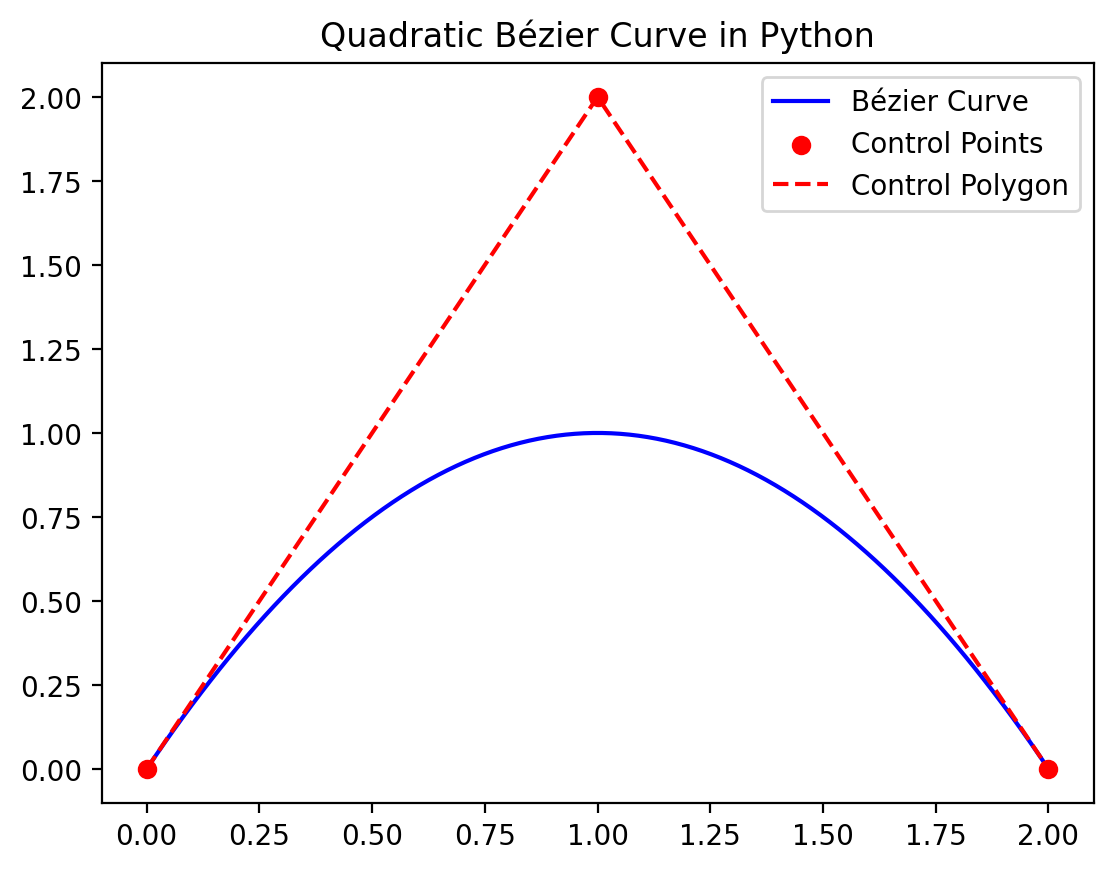

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Onri prefers using rcParams to increase the quality of all plots to be higher than the default settings.
# This only needs to be done once at beginning of every Jupyter Notebook.
plt.rcParams['figure.dpi'] = 200

# Quadratic Bézier curve function
def bezier_curve(t, P0, P1, P2):
    return (1 - t)**2 * P0 + 2 * (1 - t) * t * P1 + t**2 * P2

# Control points
P0 = np.array([0, 0])
P1 = np.array([1, 2])
P2 = np.array([2, 0])

# Generate curve points
t_values = np.linspace(0, 1, 100)
curve_points = np.array([bezier_curve(t, P0, P1, P2) for t in t_values])

# Plot the curve
plt.plot(curve_points[:, 0], curve_points[:, 1], 'b-', label="Bézier Curve")
plt.scatter(*zip(P0, P1, P2), color='red', label="Control Points", zorder=3)
plt.plot([P0[0], P1[0], P2[0]], [P0[1], P1[1], P2[1]], 'r--', label="Control Polygon")

plt.legend()
plt.title("Quadratic Bézier Curve in Python")
plt.show()

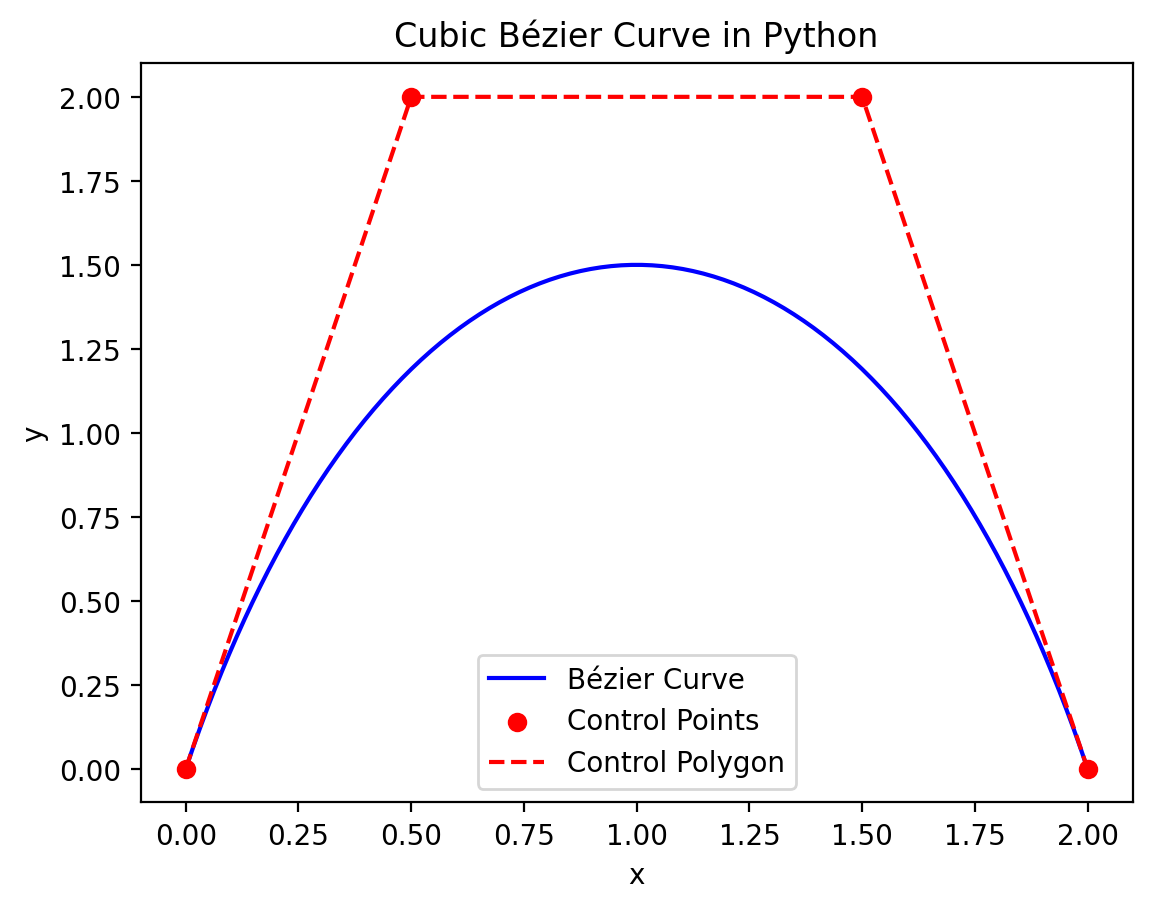

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Cubic Bézier curve function (with 4 control points)
def bezier_curve(t, P0, P1, P2, P3):
    return (1 - t)**3 * P0 + 3 * (1 - t)**2 * t * P1 + 3 * (1 - t) * t**2 * P2 + t**3 * P3

# Define 4 control points for the cubic Bézier curve
P0 = np.array([0, 0])
P1 = np.array([0.5, 2])
P2 = np.array([1.5, 2])
P3 = np.array([2, 0])

# Generate curve points
t_values = np.linspace(0, 1, 100)
curve_points = np.array([bezier_curve(t, P0, P1, P2, P3) for t in t_values])

# Plot the curve along with control points and the control polygon
plt.plot(curve_points[:, 0], curve_points[:, 1], 'b-', label="Bézier Curve")
plt.scatter(*zip(P0, P1, P2, P3), color='red', label="Control Points", zorder=3)
plt.plot([P0[0], P1[0], P2[0], P3[0]], [P0[1], P1[1], P2[1], P3[1]], 'r--', label="Control Polygon")

plt.legend()
plt.title("Cubic Bézier Curve in Python")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

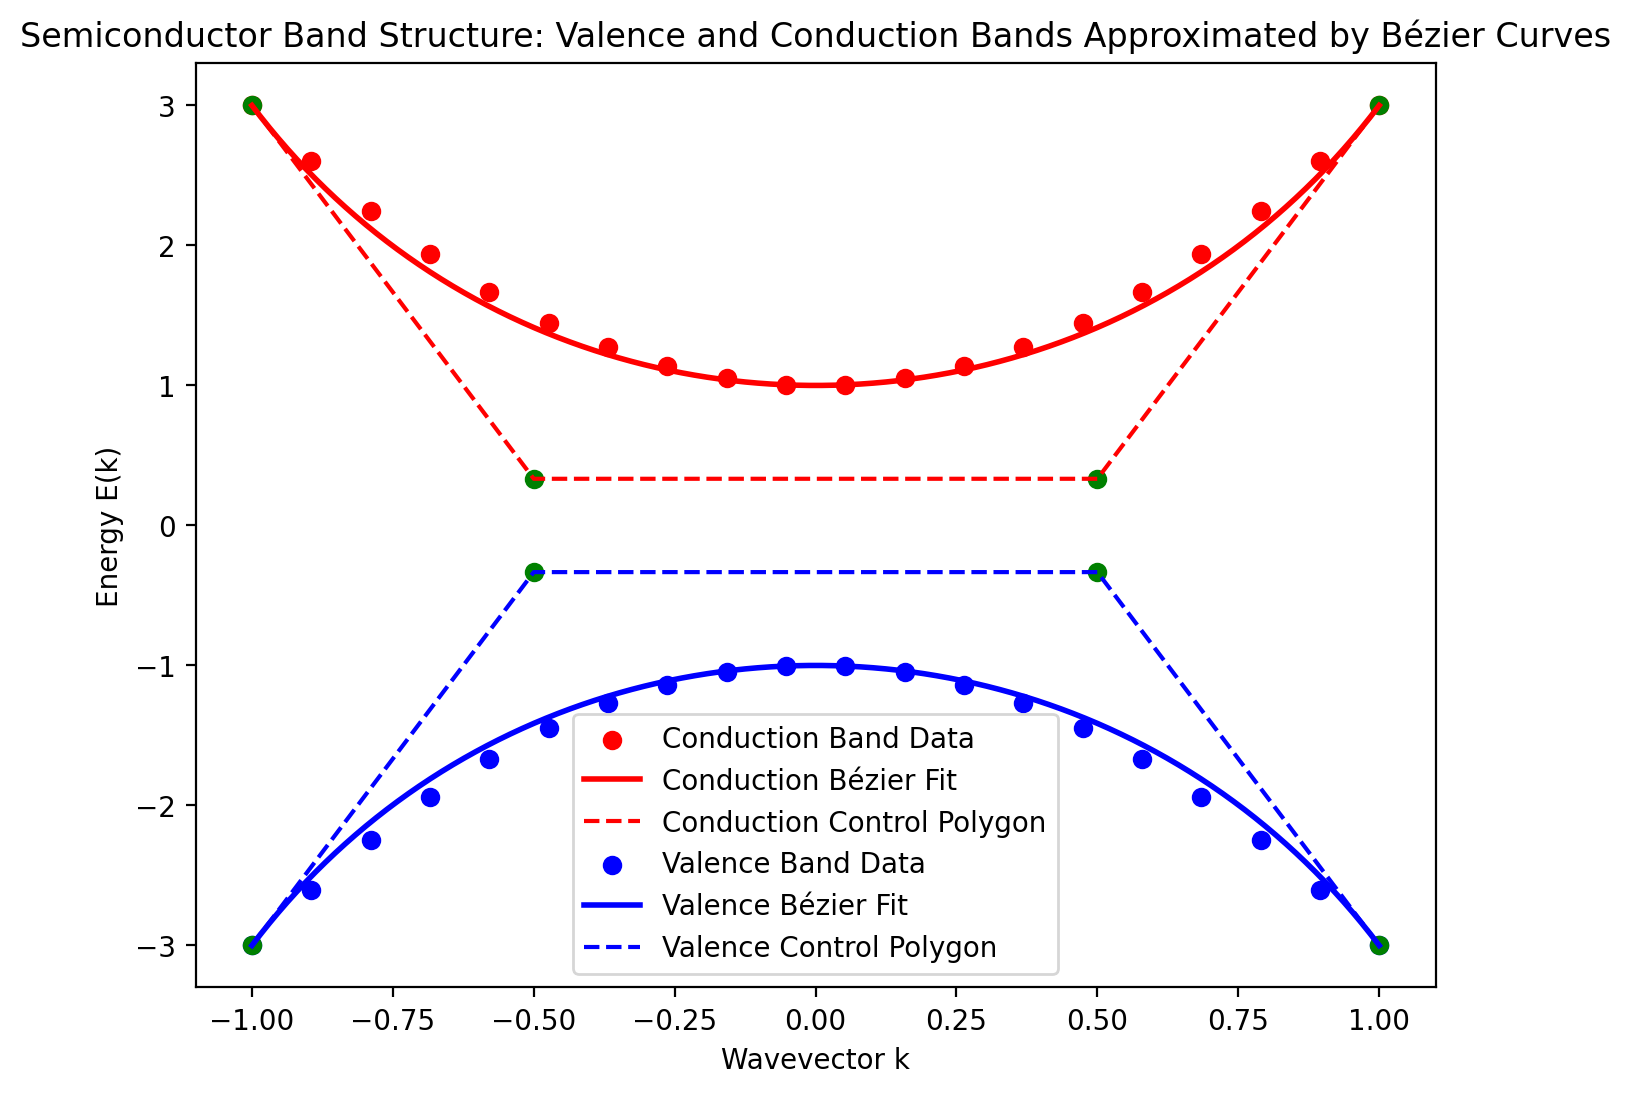

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Cubic Bézier curve function.
def bezier_curve(t, P0, P1, P2, P3):
    return ((1 - t) ** 3) * P0 + 3 * ((1 - t) ** 2) * t * P1 + 3 * (1 - t) * (t ** 2) * P2 + (t ** 3) * P3

# Synthetic semiconductor band data.
k_vals = np.linspace(-1, 1, 20)  # k-space values (normalized)

# Conduction band: upward opening parabola.
E_conduction = 1 + 2 * k_vals**2  # Minimum at k = 0 is 1, endpoints are 3.

# Valence band: inverted (downward opening) parabola.
E_valence = -1 - 2 * k_vals**2   # Maximum at k = 0 is -1, endpoints are -3.

# Function to fit a Bézier curve to given band data.
def fit_bezier(k_vals, E_vals, initial_offset=0.5, offset_energy=1):
    # Fixed endpoints: the Bézier curve must pass through the first and last data points.
    P0 = np.array([k_vals[0], E_vals[0]])
    P3 = np.array([k_vals[-1], E_vals[-1]])

    # Initial guess for the control points P1 and P2.
    P1 = np.array([k_vals[0] + initial_offset, E_vals[0] + offset_energy])
    P2 = np.array([k_vals[-1] - initial_offset, E_vals[-1] + offset_energy])

    # Define loss function as the mean squared error between the Bézier curve and data.
    def loss_function(params):
        P1_guess = np.array([params[0], params[1]])
        P2_guess = np.array([params[2], params[3]])
        t_vals_fit = np.linspace(0, 1, len(k_vals))
        bezier_points = np.array([bezier_curve(t, P0, P1_guess, P2_guess, P3) for t in t_vals_fit])
        return np.mean((bezier_points[:, 1] - E_vals) ** 2)

    # Optimize control points.
    result = minimize(loss_function, [P1[0], P1[1], P2[0], P2[1]], method='Powell')
    P1_opt = np.array([result.x[0], result.x[1]])
    P2_opt = np.array([result.x[2], result.x[3]])

    # Generate a high-resolution Bézier curve using the optimized control points.
    t_vals_high = np.linspace(0, 1, 100)
    bezier_points = np.array([bezier_curve(t, P0, P1_opt, P2_opt, P3) for t in t_vals_high])

    return P0, P1_opt, P2_opt, P3, bezier_points

# Fit conduction band (upper band).
P0_c, P1_c, P2_c, P3_c, bezier_conduction = fit_bezier(k_vals, E_conduction, initial_offset=0.5, offset_energy=1)

# Fit valence band (lower band). Here we use a negative offset_energy so that the curve bends appropriately.
P0_v, P1_v, P2_v, P3_v, bezier_valence = fit_bezier(k_vals, E_valence, initial_offset=0.5, offset_energy=-1)

# Plotting both bands.
plt.figure(figsize=(8, 6))

# Plot conduction band data and Bézier fit.
plt.scatter(k_vals, E_conduction, color='red', label="Conduction Band Data")
plt.plot(bezier_conduction[:, 0], bezier_conduction[:, 1], 'r-', linewidth=2, label="Conduction Bézier Fit")
plt.plot([P0_c[0], P1_c[0], P2_c[0], P3_c[0]], [P0_c[1], P1_c[1], P2_c[1], P3_c[1]], 'r--', label="Conduction Control Polygon")
plt.scatter(*zip(P0_c, P1_c, P2_c, P3_c), color='green', marker='o')

# Plot valence band data and Bézier fit.
plt.scatter(k_vals, E_valence, color='blue', label="Valence Band Data")
plt.plot(bezier_valence[:, 0], bezier_valence[:, 1], 'b-', linewidth=2, label="Valence Bézier Fit")
plt.plot([P0_v[0], P1_v[0], P2_v[0], P3_v[0]], [P0_v[1], P1_v[1], P2_v[1], P3_v[1]], 'b--', label="Valence Control Polygon")
plt.scatter(*zip(P0_v, P1_v, P2_v, P3_v), color='green', marker='o')

plt.xlabel("Wavevector k")
plt.ylabel("Energy E(k)")
plt.title("Semiconductor Band Structure: Valence and Conduction Bands Approximated by Bézier Curves")
plt.legend()
# plt.grid(True)
plt.show()

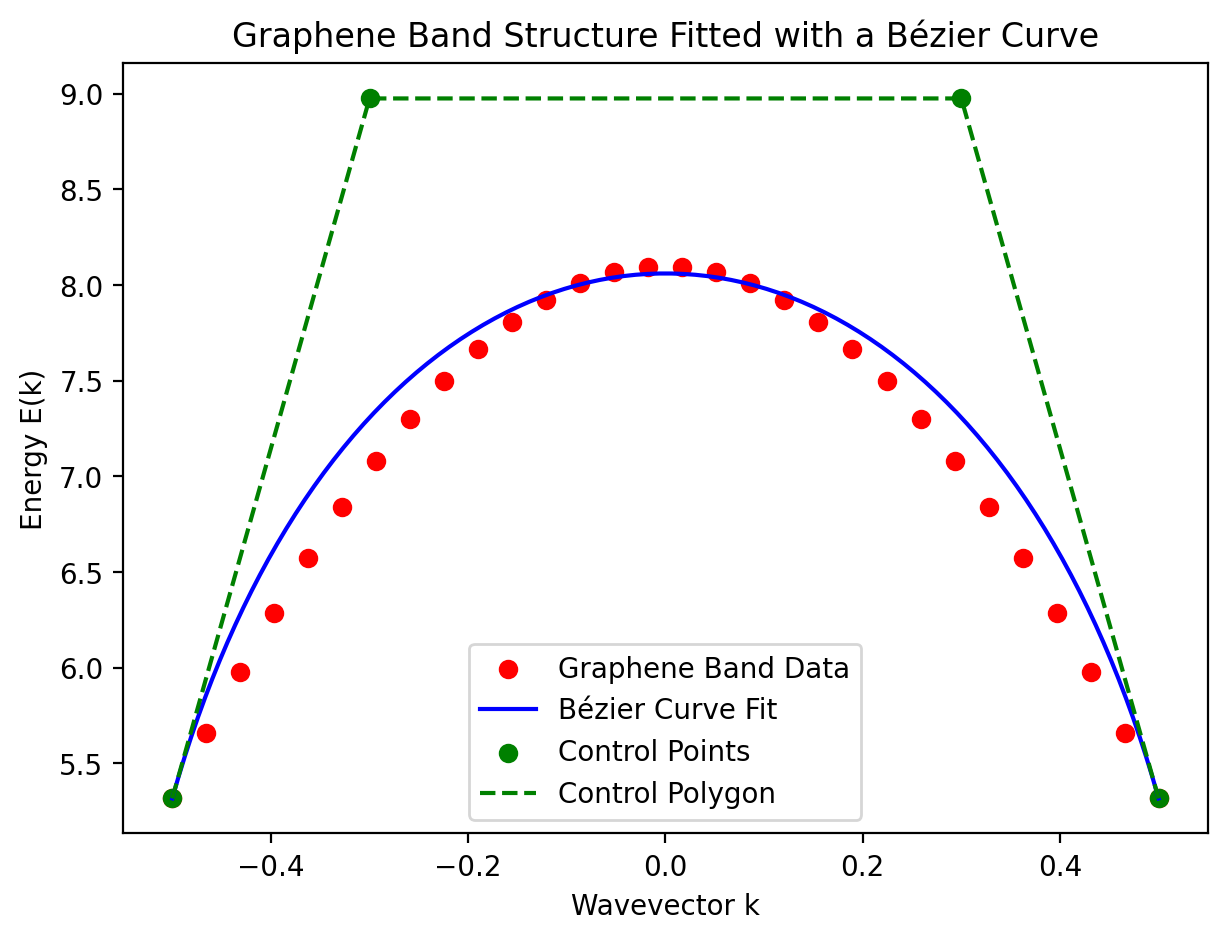

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Graphene tight-binding model for nearest neighbors
def graphene_band(kx, ky, t=2.7):  # t is the hopping parameter in eV
    a = 1.42  # Carbon-carbon bond length in Ångstroms
    sqrt3 = np.sqrt(3)

    # Reciprocal lattice vectors
    k1 = np.array([kx, ky])

    # Graphene's tight-binding Hamiltonian (simplified)
    f_k = np.exp(1j * (sqrt3 * k1[1] * a)) + 2 * np.cos(1.5 * k1[0] * a) * np.exp(-1j * (sqrt3 * k1[1] * a / 2))
    E_k = t * np.abs(f_k)  # Energy dispersion

    return E_k

# Generate band structure around Dirac point (K-point)
kx_vals = np.linspace(-0.5, 0.5, 30)  # Momentum space around K-point
ky_vals = np.zeros_like(kx_vals)
E_vals = np.array([graphene_band(kx, ky) for kx, ky in zip(kx_vals, ky_vals)])  # Conduction band only

# Define cubic Bézier curve function
def bezier_curve(t, P0, P1, P2, P3):
    return ((1 - t) ** 3) * P0 + 3 * ((1 - t) ** 2) * t * P1 + 3 * (1 - t) * (t ** 2) * P2 + (t ** 3) * P3

# Fix Bézier curve endpoints (it must pass through first and last points)
P0 = np.array([kx_vals[0], E_vals[0]])
P3 = np.array([kx_vals[-1], E_vals[-1]])

# Initial guess for control points
P1 = np.array([kx_vals[0] + 0.2, E_vals[0] + 0.5])
P2 = np.array([kx_vals[-1] - 0.2, E_vals[-1] + 0.5])

# Loss function to optimize Bézier control points
def loss_function(params):
    P1_guess = np.array([params[0], params[1]])
    P2_guess = np.array([params[2], params[3]])

    # Compute Bézier points
    t_vals = np.linspace(0, 1, len(kx_vals))
    bezier_points = np.array([bezier_curve(t, P0, P1_guess, P2_guess, P3) for t in t_vals])

    # Mean squared error between Bézier curve and graphene band
    return np.mean((bezier_points[:, 1] - E_vals) ** 2)

# Optimize P1 and P2
result = minimize(loss_function, [P1[0], P1[1], P2[0], P2[1]], method='Powell')
P1_opt = np.array([result.x[0], result.x[1]])
P2_opt = np.array([result.x[2], result.x[3]])

# Generate Bézier curve points with optimized control points
t_vals = np.linspace(0, 1, 100)
bezier_points = np.array([bezier_curve(t, P0, P1_opt, P2_opt, P3) for t in t_vals])

# Plot results
plt.figure(figsize=(7, 5))
plt.scatter(kx_vals, E_vals, color='red', label="Graphene Band Data")
plt.plot(bezier_points[:, 0], bezier_points[:, 1], 'b-', label="Bézier Curve Fit")
plt.scatter(*zip(P0, P1_opt, P2_opt, P3), color='green', marker='o', label="Control Points")
plt.plot([P0[0], P1_opt[0], P2_opt[0], P3[0]], [P0[1], P1_opt[1], P2_opt[1], P3[1]], 'g--', label="Control Polygon")

plt.xlabel("Wavevector k")
plt.ylabel("Energy E(k)")
plt.title("Graphene Band Structure Fitted with a Bézier Curve")
plt.legend()
# plt.grid(True)
plt.show()

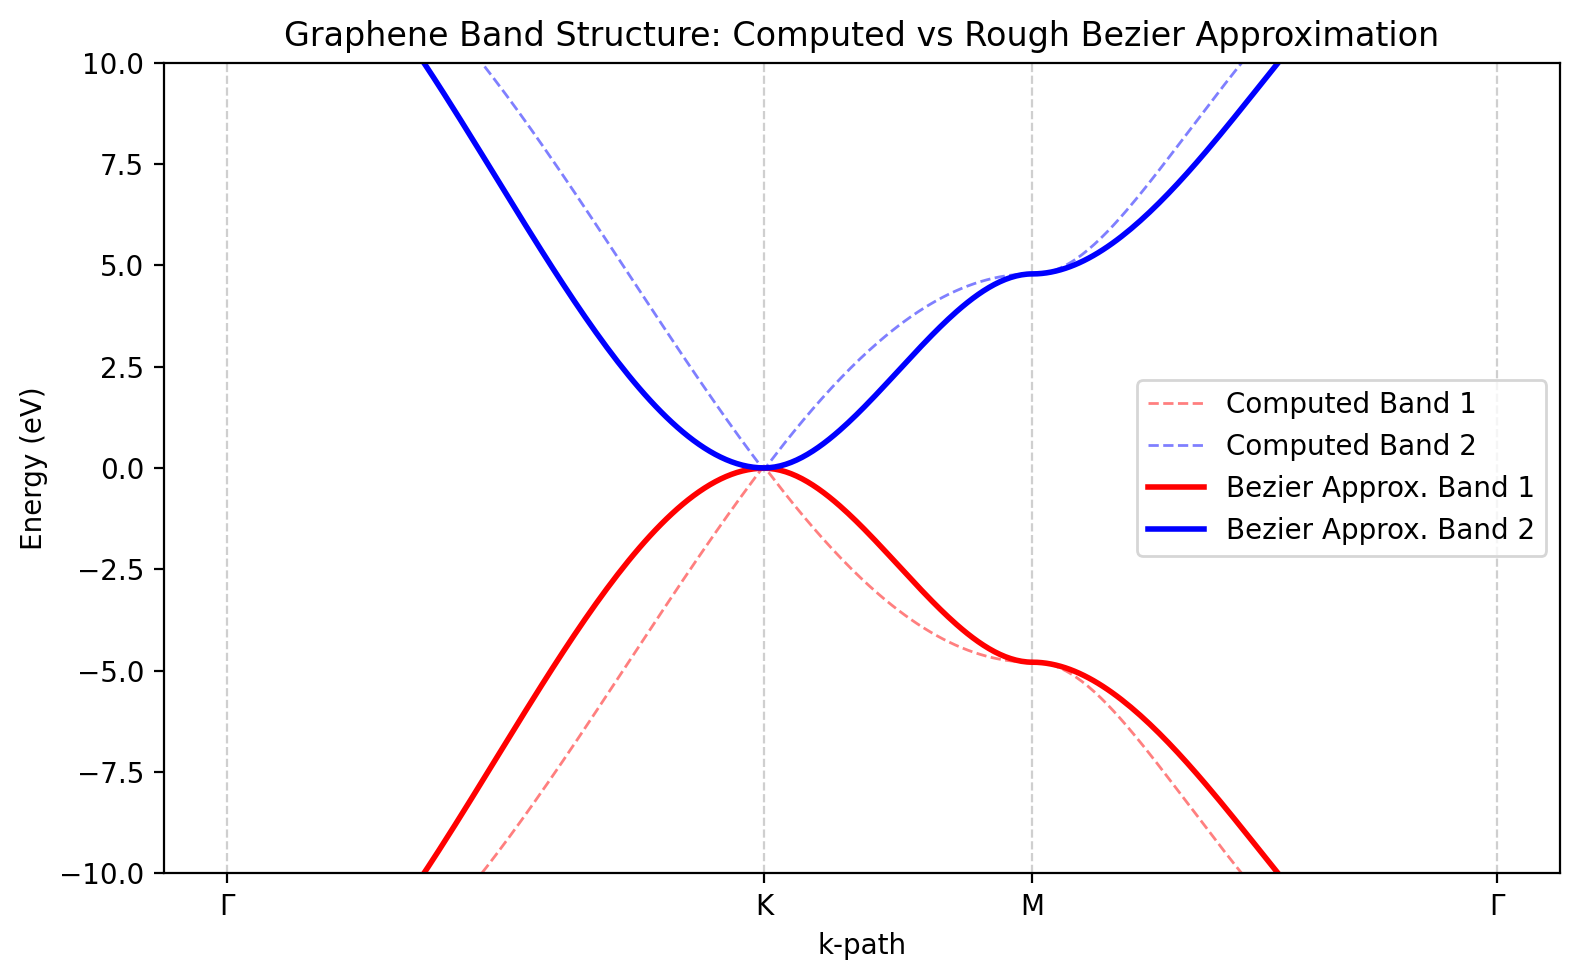

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def hamiltonian_pz(kpts):
    """
    Constructs the Hamiltonian for pz orbitals in graphene.
    """
    a0 = 1.42  # Carbon-carbon bond length in Ångstroms
    Ep = 0     # On-site energy for pz orbitals
    Vpps = 5.618  # Sigma-bonding contribution
    Vppp = -3.070  # Pi-bonding contribution
    t = (1/3) * Vpps + Vppp  # Effective hopping parameter

    # Define lattice vectors
    R1 = a0 * np.array([0, 1])
    R2 = a0 * np.array([-np.sqrt(3)/2, -1/2])
    R3 = a0 * np.array([np.sqrt(3)/2, -1/2])

    # Phase factors
    k1 = np.dot(kpts, R1)
    k2 = np.dot(kpts, R2)
    k3 = np.dot(kpts, R3)
    f = np.exp(1j * k1) + np.exp(1j * k2) + np.exp(1j * k3)

    # Hamiltonian matrix for pz-only model
    A = Ep
    B = 4 * t * f
    H = np.array([[A, B], [np.conj(B), A]])
    return H

def cubic_bezier(P0, P1, P2, P3, num=100):
    """
    Returns num points on a cubic Bezier curve defined by control points P0, P1, P2, P3.
    Each P is a 2D point (x,y).
    """
    t = np.linspace(0, 1, num)
    curve = np.outer((1-t)**3, P0) + np.outer(3*(1-t)**2*t, P1) \
          + np.outer(3*(1-t)*t**2, P2) + np.outer(t**3, P3)
    return curve

# --- Define high-symmetry points and parameters ---
a = 2.46  # Lattice constant in Ångstroms
K_const = 2 * np.pi / a  # Reciprocal lattice constant

# Reciprocal lattice vectors
b1 = K_const * np.array([1, 1/np.sqrt(3)])
b2 = K_const * np.array([1, -1/np.sqrt(3)])

# High-symmetry points in reciprocal space:
# Γ = (0,0), K = 1/3*(b1+b2), M = 1/2*(b1-b2)
G_vec = np.array([0, 0])
K_frac = np.array([1/3, 1/3])
M_frac = np.array([0, 1/2])
G = G_vec  # Γ at origin
K_point = K_frac[0] * b1 + K_frac[1] * b2
M_point = M_frac[0] * b1 + M_frac[1] * b2

# For the full path: Γ -> K -> M -> Γ, we define a continuous k-mesh (for computed points)
dk = 1e-2
# Compute approximate number of points along each segment using Euclidean distances
NK1 = round(np.linalg.norm(K_point - G) / dk)
NK2 = round(np.linalg.norm(M_point - K_point) / dk)
NK3 = round(np.linalg.norm(G - M_point) / dk)
NT = NK1 + NK2 + NK3
k_region = np.linspace(0, 1, NT)

# --- Compute full band structure along the path (for reference) ---
band_full = np.zeros((NT, 2))

# Γ -> K
t1_vals = np.linspace(0, 1, NK1)
for i, t in enumerate(t1_vals):
    kpt = G + t*(K_point - G)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i, :] = np.real(eigvals)

# K -> M
t2_vals = np.linspace(0, 1, NK2)
for i, t in enumerate(t2_vals):
    kpt = K_point + t*(M_point - K_point)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i+NK1, :] = np.real(eigvals)

# M -> Γ
t3_vals = np.linspace(0, 1, NK3)
for i, t in enumerate(t3_vals):
    kpt = M_point + t*(G - M_point)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i+NK1+NK2, :] = np.real(eigvals)

# --- Evaluate eigenvalues at high-symmetry points ---
def get_eigs(kpt):
    H = hamiltonian_pz(kpt)
    return np.sort(np.real(np.linalg.eigvalsh(H)))

eig_G = get_eigs(G)
eig_K = get_eigs(K_point)
eig_M = get_eigs(M_point)
# Final Γ point (should match initial Γ)
eig_G_final = get_eigs(G)

# Define x-coordinates for the high-symmetry points on the normalized k-path
x_G = 0.0
x_K = NK1 / NT
x_M = (NK1 + NK2) / NT
x_G_final = 1.0

# --- Construct Bezier curves for each band using high-symmetry endpoints ---
# We define a helper to create a Bezier segment between two points
def bezier_segment(x0, y0, x1, y1, num=100):
    P0 = np.array([x0, y0])
    P3 = np.array([x1, y1])
    # Simple control points: offset by one-third of horizontal distance
    dx = (x1 - x0) / 3.0
    P1 = np.array([x0 + dx, y0])
    P2 = np.array([x1 - dx, y1])
    return cubic_bezier(P0, P1, P2, P3, num)

# For each band (0 and 1), build the full Bezier–approximated curve over the three segments.
bezier_curves = {0: ([], []), 1: ([], [])}  # dict to store (x,y) for each band

num_seg = 100  # number of points per segment

for band_index in [0, 1]:
    # Collect segments for each band
    seg1 = bezier_segment(x_G, eig_G[band_index], x_K, eig_K[band_index], num_seg)
    seg2 = bezier_segment(x_K, eig_K[band_index], x_M, eig_M[band_index], num_seg)
    seg3 = bezier_segment(x_M, eig_M[band_index], x_G_final, eig_G_final[band_index], num_seg)

    # Concatenate the segments (excluding duplicate endpoints)
    curve = np.vstack((seg1, seg2[1:], seg3[1:]))
    bezier_curves[band_index] = (curve[:,0], curve[:,1])

# --- Plotting ---
plt.figure(figsize=(8, 5))

# Plot original computed band structure (for reference)
plt.plot(k_region, band_full[:, 0], 'r--', linewidth=1, alpha=0.5, label='Computed Band 1')
plt.plot(k_region, band_full[:, 1], 'b--', linewidth=1, alpha=0.5, label='Computed Band 2')

# Plot Bezier curve approximations
plt.plot(bezier_curves[0][0], bezier_curves[0][1], 'r', linewidth=2, label='Bezier Approx. Band 1')
plt.plot(bezier_curves[1][0], bezier_curves[1][1], 'b', linewidth=2, label='Bezier Approx. Band 2')

# Set up x-ticks at high-symmetry points
kpoints_x = [x_G, x_K, x_M, x_G_final]
kpoints_labels = ['Γ', 'K', 'M', 'Γ']
plt.xticks(kpoints_x, kpoints_labels)

plt.xlabel('k-path')
plt.ylabel('Energy (eV)')
plt.title('Graphene Band Structure: Computed vs Rough Bezier Approximation')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.ylim([-10, 10])
plt.legend()
plt.tight_layout()
plt.show()

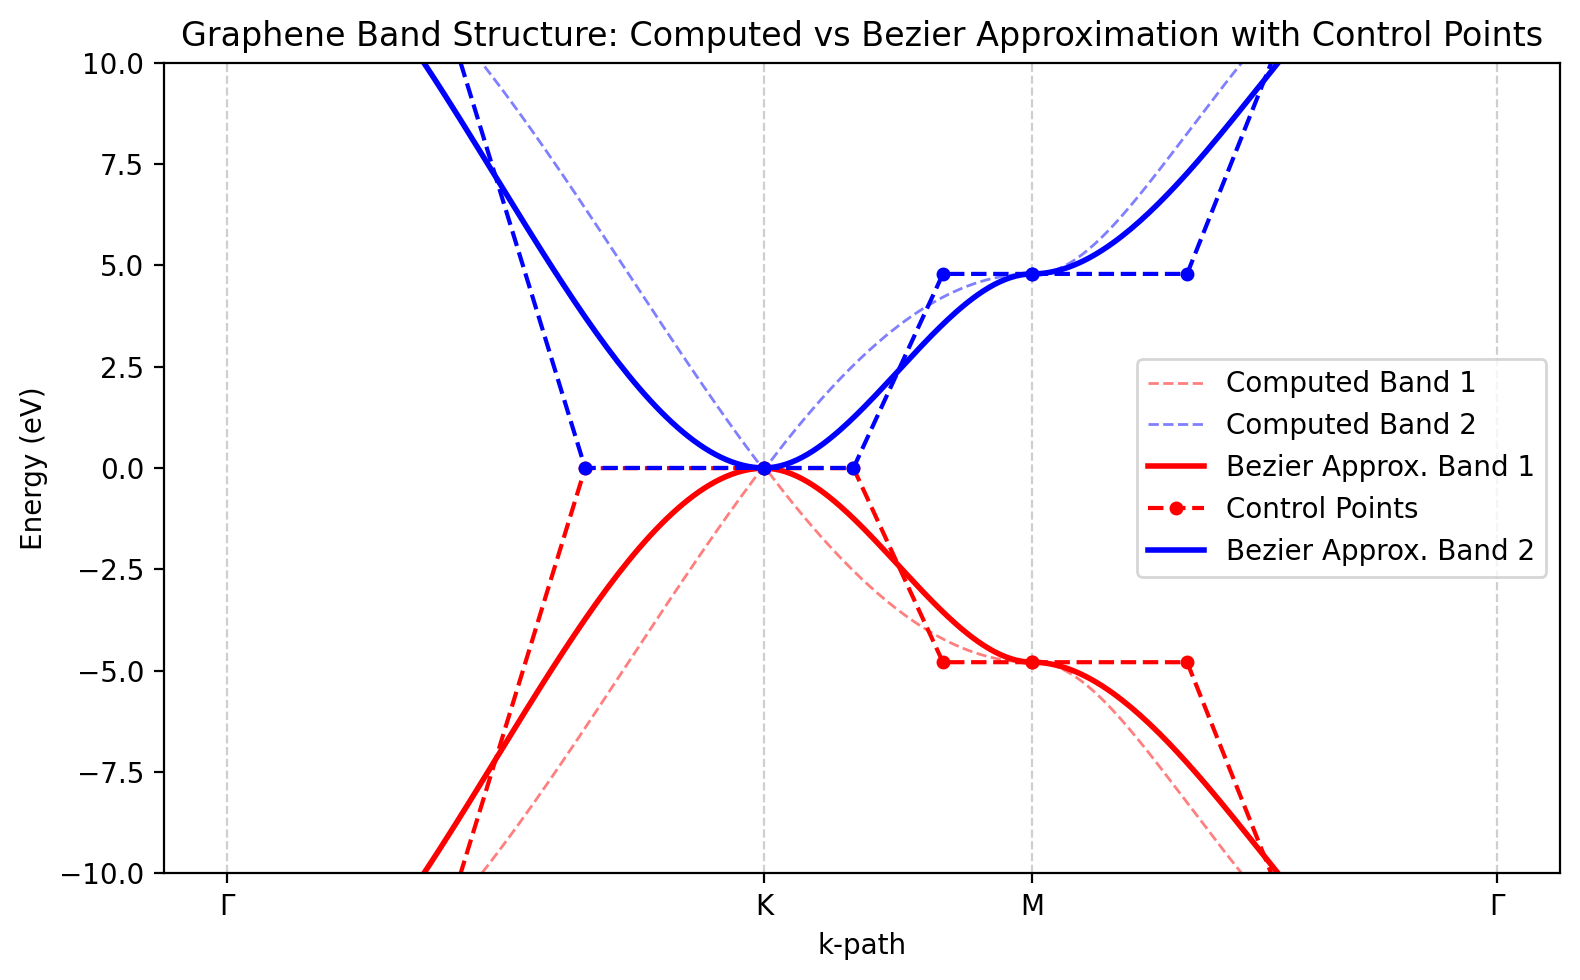

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def hamiltonian_pz(kpts):
    """
    Constructs the Hamiltonian for pz orbitals in graphene.
    """
    a0 = 1.42  # Carbon-carbon bond length in Ångstroms
    Ep = 0     # On-site energy for pz orbitals
    Vpps = 5.618  # Sigma-bonding contribution
    Vppp = -3.070  # Pi-bonding contribution
    t = (1/3) * Vpps + Vppp  # Effective hopping parameter

    # Define lattice vectors
    R1 = a0 * np.array([0, 1])
    R2 = a0 * np.array([-np.sqrt(3)/2, -1/2])
    R3 = a0 * np.array([np.sqrt(3)/2, -1/2])

    # Phase factors
    k1 = np.dot(kpts, R1)
    k2 = np.dot(kpts, R2)
    k3 = np.dot(kpts, R3)
    f = np.exp(1j * k1) + np.exp(1j * k2) + np.exp(1j * k3)

    # Hamiltonian matrix for pz-only model
    A = Ep
    B = 4 * t * f
    H = np.array([[A, B], [np.conj(B), A]])
    return H

def cubic_bezier(P0, P1, P2, P3, num=100):
    """
    Returns num points on a cubic Bezier curve defined by control points P0, P1, P2, P3.
    Each P is a 2D point (x,y).
    """
    t = np.linspace(0, 1, num)
    curve = np.outer((1-t)**3, P0) + np.outer(3*(1-t)**2*t, P1) \
          + np.outer(3*(1-t)*t**2, P2) + np.outer(t**3, P3)
    return curve

# --- Define high-symmetry points and parameters ---
a = 2.46  # Lattice constant in Ångstroms
K_const = 2 * np.pi / a  # Reciprocal lattice constant

# Reciprocal lattice vectors
b1 = K_const * np.array([1, 1/np.sqrt(3)])
b2 = K_const * np.array([1, -1/np.sqrt(3)])

# High-symmetry points in reciprocal space:
# Γ = (0,0), K = 1/3*(b1+b2), M = 1/2*(b1-b2)
G_vec = np.array([0, 0])
K_frac = np.array([1/3, 1/3])
M_frac = np.array([0, 1/2])
G = G_vec  # Γ at origin
K_point = K_frac[0] * b1 + K_frac[1] * b2
M_point = M_frac[0] * b1 + M_frac[1] * b2

# For the full path: Γ -> K -> M -> Γ, we define a continuous k-mesh (for computed points)
dk = 1e-2
# Compute approximate number of points along each segment using Euclidean distances
NK1 = round(np.linalg.norm(K_point - G) / dk)
NK2 = round(np.linalg.norm(M_point - K_point) / dk)
NK3 = round(np.linalg.norm(G - M_point) / dk)
NT = NK1 + NK2 + NK3
k_region = np.linspace(0, 1, NT)

# --- Compute full band structure along the path (for reference) ---
band_full = np.zeros((NT, 2))

# Γ -> K
t1_vals = np.linspace(0, 1, NK1)
for i, t in enumerate(t1_vals):
    kpt = G + t*(K_point - G)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i, :] = np.real(eigvals)

# K -> M
t2_vals = np.linspace(0, 1, NK2)
for i, t in enumerate(t2_vals):
    kpt = K_point + t*(M_point - K_point)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i+NK1, :] = np.real(eigvals)

# M -> Γ
t3_vals = np.linspace(0, 1, NK3)
for i, t in enumerate(t3_vals):
    kpt = M_point + t*(G - M_point)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i+NK1+NK2, :] = np.real(eigvals)

# --- Evaluate eigenvalues at high-symmetry points ---
def get_eigs(kpt):
    H = hamiltonian_pz(kpt)
    return np.sort(np.real(np.linalg.eigvalsh(H)))

eig_G = get_eigs(G)
eig_K = get_eigs(K_point)
eig_M = get_eigs(M_point)
# Final Γ point (should match initial Γ)
eig_G_final = get_eigs(G)

# Define x-coordinates for the high-symmetry points on the normalized k-path
x_G = 0.0
x_K = NK1 / NT
x_M = (NK1 + NK2) / NT
x_G_final = 1.0

# --- Construct Bezier curves for each band using high-symmetry endpoints ---
# Modified helper: returns both curve and control points
def bezier_segment(x0, y0, x1, y1, num=100):
    P0 = np.array([x0, y0])
    P3 = np.array([x1, y1])
    dx = (x1 - x0) / 3.0
    P1 = np.array([x0 + dx, y0])
    P2 = np.array([x1 - dx, y1])
    curve = cubic_bezier(P0, P1, P2, P3, num)
    control_points = np.array([P0, P1, P2, P3])
    return curve, control_points

# For each band (0 and 1), build the full Bezier–approximated curve over the three segments.
bezier_curves = {0: ([], []), 1: ([], [])}  # dict to store (x,y) for each band

num_seg = 100  # number of points per segment

# Create a new figure
plt.figure(figsize=(8, 5))

# Plot original computed band structure (for reference)
plt.plot(k_region, band_full[:, 0], 'r--', linewidth=1, alpha=0.5, label='Computed Band 1')
plt.plot(k_region, band_full[:, 1], 'b--', linewidth=1, alpha=0.5, label='Computed Band 2')

# Plot Bezier curve approximations and control points
for band_index, color in zip([0, 1], ['r', 'b']):
    # Compute segments and capture control points
    seg1, cp1 = bezier_segment(x_G, eig_G[band_index], x_K, eig_K[band_index], num_seg)
    seg2, cp2 = bezier_segment(x_K, eig_K[band_index], x_M, eig_M[band_index], num_seg)
    seg3, cp3 = bezier_segment(x_M, eig_M[band_index], x_G_final, eig_G_final[band_index], num_seg)

    # Concatenate the segments (excluding duplicate endpoints)
    curve = np.vstack((seg1, seg2[1:], seg3[1:]))
    bezier_curves[band_index] = (curve[:,0], curve[:,1])

    # Plot the Bezier curve
    plt.plot(bezier_curves[band_index][0], bezier_curves[band_index][1],
             color=color, linewidth=2,
             label=f'Bezier Approx. Band {band_index+1}')

    # Plot the control points for each segment with dashed lines connecting them
    # Use the same color but with distinct markers
    plt.plot(cp1[:,0], cp1[:,1], 'o--', color=color, markersize=4,
             label='Control Points' if band_index==0 else None)
    plt.plot(cp2[:,0], cp2[:,1], 'o--', color=color, markersize=4)
    plt.plot(cp3[:,0], cp3[:,1], 'o--', color=color, markersize=4)

# Set up x-ticks at high-symmetry points
kpoints_x = [x_G, x_K, x_M, x_G_final]
kpoints_labels = ['Γ', 'K', 'M', 'Γ']
plt.xticks(kpoints_x, kpoints_labels)

plt.xlabel('k-path')
plt.ylabel('Energy (eV)')
plt.title('Graphene Band Structure: Computed vs Bezier Approximation with Control Points')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.ylim([-10, 10])
plt.legend()
plt.tight_layout()
plt.show()

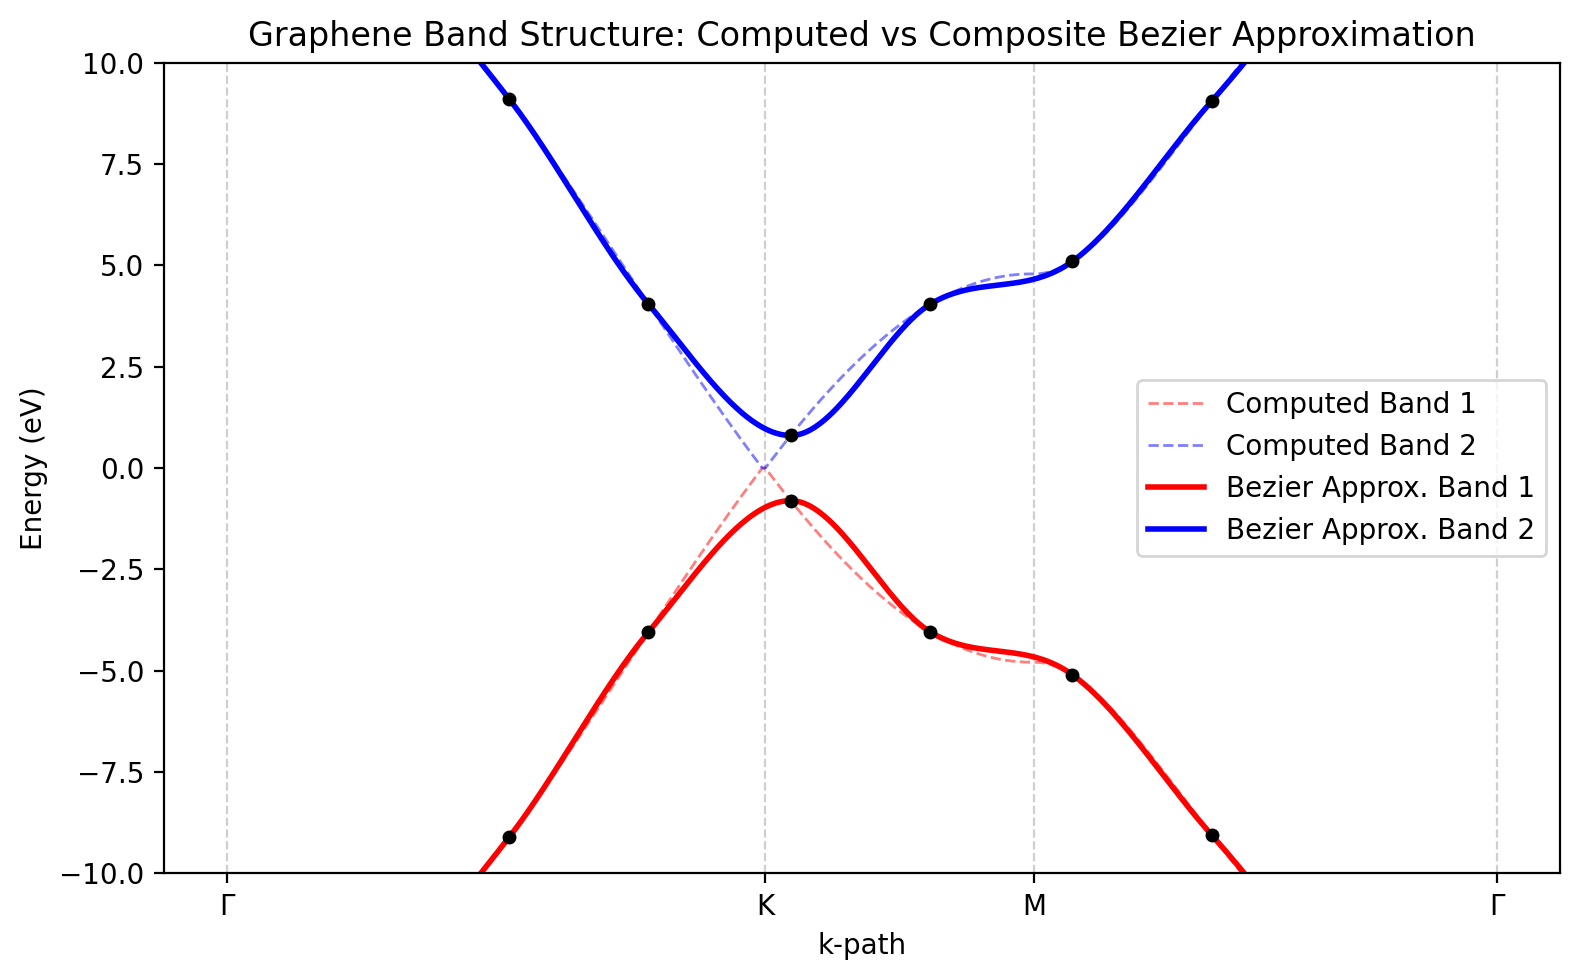

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def hamiltonian_pz(kpts):
    """
    Constructs the Hamiltonian for pz orbitals in graphene.
    """
    a0 = 1.42  # Carbon-carbon bond length in Ångstroms
    Ep = 0     # On-site energy for pz orbitals
    Vpps = 5.618  # Sigma-bonding contribution
    Vppp = -3.070  # Pi-bonding contribution
    t = (1/3) * Vpps + Vppp  # Effective hopping parameter

    # Define lattice vectors
    R1 = a0 * np.array([0, 1])
    R2 = a0 * np.array([-np.sqrt(3)/2, -1/2])
    R3 = a0 * np.array([np.sqrt(3)/2, -1/2])

    # Phase factors
    k1 = np.dot(kpts, R1)
    k2 = np.dot(kpts, R2)
    k3 = np.dot(kpts, R3)
    f = np.exp(1j * k1) + np.exp(1j * k2) + np.exp(1j * k3)

    # Hamiltonian matrix for pz-only model
    A = Ep
    B = 4 * t * f
    H = np.array([[A, B], [np.conj(B), A]])
    return H

def cubic_bezier(P0, P1, P2, P3, num=100):
    """
    Returns num points on a cubic Bezier curve defined by control points P0, P1, P2, P3.
    Each P is a 2D point (x,y).
    """
    t = np.linspace(0, 1, num)
    curve = np.outer((1-t)**3, P0) + np.outer(3*(1-t)**2*t, P1) \
          + np.outer(3*(1-t)*t**2, P2) + np.outer(t**3, P3)
    return curve

# --- Define high-symmetry points and parameters ---
a = 2.46  # Lattice constant in Ångstroms
K_const = 2 * np.pi / a  # Reciprocal lattice constant

# Reciprocal lattice vectors
b1 = K_const * np.array([1, 1/np.sqrt(3)])
b2 = K_const * np.array([1, -1/np.sqrt(3)])

# High-symmetry points:
# Γ = (0,0), K = 1/3*(b1+b2), M = 1/2*(b1-b2)
G_vec = np.array([0, 0])
K_frac = np.array([1/3, 1/3])
M_frac = np.array([0, 1/2])
G = G_vec  # Γ at origin
K_point = K_frac[0] * b1 + K_frac[1] * b2
M_point = M_frac[0] * b1 + M_frac[1] * b2

# Define the full k–path: Γ -> K -> M -> Γ
dk = 1e-2
NK1 = round(np.linalg.norm(K_point - G) / dk)
NK2 = round(np.linalg.norm(M_point - K_point) / dk)
NK3 = round(np.linalg.norm(G - M_point) / dk)
NT = NK1 + NK2 + NK3
k_region = np.linspace(0, 1, NT)

# --- Compute the full band structure along the k–path (for reference) ---
band_full = np.zeros((NT, 2))
# Γ -> K
t1_vals = np.linspace(0, 1, NK1)
for i, t in enumerate(t1_vals):
    kpt = G + t*(K_point - G)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i, :] = np.real(eigvals)
# K -> M
t2_vals = np.linspace(0, 1, NK2)
for i, t in enumerate(t2_vals):
    kpt = K_point + t*(M_point - K_point)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i+NK1, :] = np.real(eigvals)
# M -> Γ
t3_vals = np.linspace(0, 1, NK3)
for i, t in enumerate(t3_vals):
    kpt = M_point + t*(G - M_point)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i+NK1+NK2, :] = np.real(eigvals)

# --- Bezier interpolation using additional control (anchor) points ---
# We sample anchor points along the computed curve.
num_anchors = 10  # Increase this number for more control points
indices = np.linspace(0, NT-1, num=num_anchors, dtype=int)
x_anchors = k_region[indices]

# For each band, extract the y-values at these anchors.
anchors = {0: band_full[indices, 0], 1: band_full[indices, 1]}

def compute_derivatives(x, y):
    """
    Compute approximate derivatives at anchor points using finite differences.
    """
    m = np.zeros_like(y)
    n = len(y)
    for i in range(n):
        if i == 0:
            # forward difference at first point
            m[i] = (y[i+1] - y[i]) / (x[i+1] - x[i])
        elif i == n - 1:
            # backward difference at last point
            m[i] = (y[i] - y[i-1]) / (x[i] - x[i-1])
        else:
            m[i] = (y[i+1] - y[i-1]) / (x[i+1] - x[i-1])
    return m

# Compute derivatives for each band from the anchor points
derivatives = {band: compute_derivatives(x_anchors, anchors[band])
               for band in [0, 1]}

def bezier_from_anchors(x, y, m, num_seg=100):
    """
    Construct a composite Bezier curve from anchor points (x,y) with derivatives m.
    Each segment uses a cubic Bezier curve determined by endpoints and estimated slopes.
    """
    curve_x = []
    curve_y = []
    n = len(x)
    for i in range(n-1):
        x0, y0, m0 = x[i], y[i], m[i]
        x1, y1, m1 = x[i+1], y[i+1], m[i+1]
        dx = x1 - x0
        # Control points via cubic Hermite formulation:
        P0 = np.array([x0, y0])
        P3 = np.array([x1, y1])
        P1 = np.array([x0 + dx/3.0, y0 + (dx/3.0)*m0])
        P2 = np.array([x1 - dx/3.0, y1 - (dx/3.0)*m1])
        segment = cubic_bezier(P0, P1, P2, P3, num_seg)
        if i > 0:
            # avoid duplicating points at the junctions
            segment = segment[1:]
        curve_x.extend(segment[:,0])
        curve_y.extend(segment[:,1])
    return np.array(curve_x), np.array(curve_y)

# Generate composite Bezier curves for each band
bezier_curves = {}
for band in [0, 1]:
    bx, by = bezier_from_anchors(x_anchors, anchors[band], derivatives[band])
    bezier_curves[band] = (bx, by)

# --- Plotting ---
plt.figure(figsize=(8, 5))
# Plot the original computed bands
plt.plot(k_region, band_full[:, 0], 'r--', linewidth=1, alpha=0.5, label='Computed Band 1')
plt.plot(k_region, band_full[:, 1], 'b--', linewidth=1, alpha=0.5, label='Computed Band 2')
# Plot the composite Bezier interpolations
plt.plot(bezier_curves[0][0], bezier_curves[0][1], 'r', linewidth=2, label='Bezier Approx. Band 1')
plt.plot(bezier_curves[1][0], bezier_curves[1][1], 'b', linewidth=2, label='Bezier Approx. Band 2')
# Mark the anchor points
plt.plot(x_anchors, anchors[0], 'ko', markersize=4)
plt.plot(x_anchors, anchors[1], 'ko', markersize=4)

# Set up x-ticks at the high-symmetry points (using the known indices)
kpoints_idx = [0, NK1, NK1 + NK2, NT - 1]
kpoints_x = k_region[kpoints_idx]
kpoints_labels = ['Γ', 'K', 'M', 'Γ']
plt.xticks(kpoints_x, kpoints_labels)

plt.xlabel('k-path')
plt.ylabel('Energy (eV)')
plt.title('Graphene Band Structure: Computed vs Composite Bezier Approximation')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.ylim([-10, 10])
plt.legend()
plt.tight_layout()
plt.show()

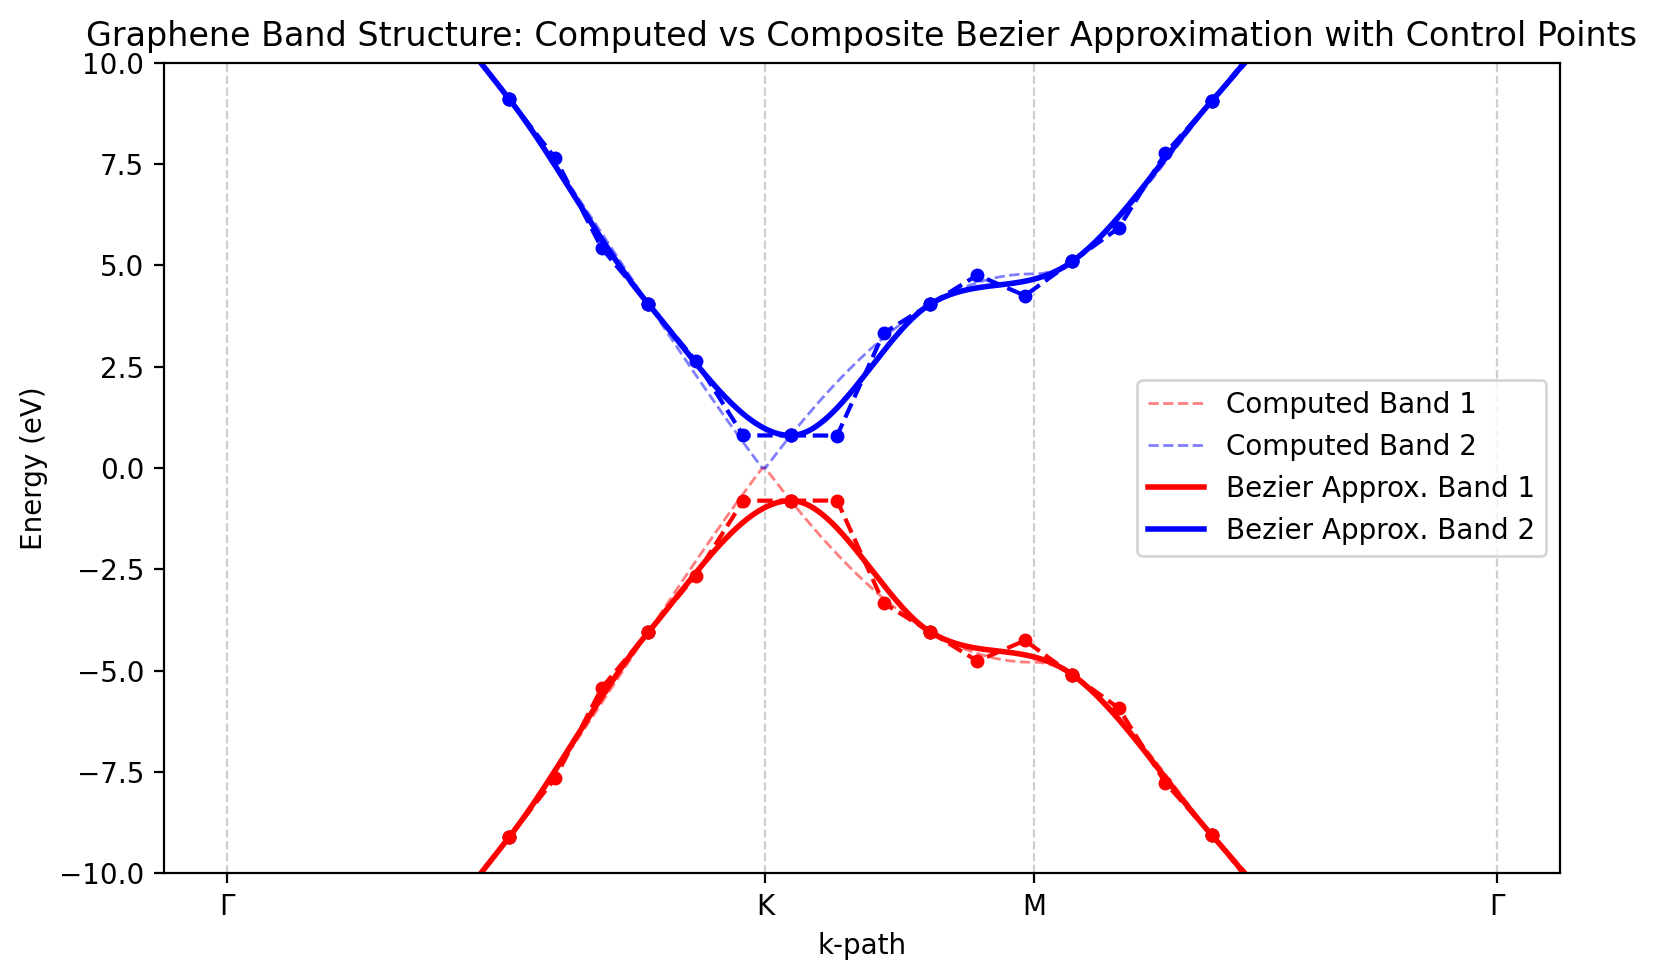

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def hamiltonian_pz(kpts):
    """
    Constructs the Hamiltonian for pz orbitals in graphene.
    """
    a0 = 1.42  # Carbon-carbon bond length in Ångstroms
    Ep = 0     # On-site energy for pz orbitals
    Vpps = 5.618  # Sigma-bonding contribution
    Vppp = -3.070  # Pi-bonding contribution
    t = (1/3) * Vpps + Vppp  # Effective hopping parameter

    # Define lattice vectors
    R1 = a0 * np.array([0, 1])
    R2 = a0 * np.array([-np.sqrt(3)/2, -1/2])
    R3 = a0 * np.array([np.sqrt(3)/2, -1/2])

    # Phase factors
    k1 = np.dot(kpts, R1)
    k2 = np.dot(kpts, R2)
    k3 = np.dot(kpts, R3)
    f = np.exp(1j * k1) + np.exp(1j * k2) + np.exp(1j * k3)

    # Hamiltonian matrix for pz-only model
    A = Ep
    B = 4 * t * f
    H = np.array([[A, B], [np.conj(B), A]])
    return H

def cubic_bezier(P0, P1, P2, P3, num=100):
    """
    Returns num points on a cubic Bezier curve defined by control points P0, P1, P2, P3.
    Each P is a 2D point (x,y).
    """
    t = np.linspace(0, 1, num)
    curve = np.outer((1-t)**3, P0) + np.outer(3*(1-t)**2*t, P1) \
          + np.outer(3*(1-t)*t**2, P2) + np.outer(t**3, P3)
    return curve

# --- Define high-symmetry points and parameters ---
a = 2.46  # Lattice constant in Ångstroms
K_const = 2 * np.pi / a  # Reciprocal lattice constant

# Reciprocal lattice vectors
b1 = K_const * np.array([1, 1/np.sqrt(3)])
b2 = K_const * np.array([1, -1/np.sqrt(3)])

# High-symmetry points:
# Γ = (0,0), K = 1/3*(b1+b2), M = 1/2*(b1-b2)
G_vec = np.array([0, 0])
K_frac = np.array([1/3, 1/3])
M_frac = np.array([0, 1/2])
G = G_vec  # Γ at origin
K_point = K_frac[0] * b1 + K_frac[1] * b2
M_point = M_frac[0] * b1 + M_frac[1] * b2

# Define the full k–path: Γ -> K -> M -> Γ
dk = 1e-2
NK1 = round(np.linalg.norm(K_point - G) / dk)
NK2 = round(np.linalg.norm(M_point - K_point) / dk)
NK3 = round(np.linalg.norm(G - M_point) / dk)
NT = NK1 + NK2 + NK3
k_region = np.linspace(0, 1, NT)

# --- Compute the full band structure along the k–path (for reference) ---
band_full = np.zeros((NT, 2))
# Γ -> K
t1_vals = np.linspace(0, 1, NK1)
for i, t in enumerate(t1_vals):
    kpt = G + t*(K_point - G)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i, :] = np.real(eigvals)
# K -> M
t2_vals = np.linspace(0, 1, NK2)
for i, t in enumerate(t2_vals):
    kpt = K_point + t*(M_point - K_point)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i+NK1, :] = np.real(eigvals)
# M -> Γ
t3_vals = np.linspace(0, 1, NK3)
for i, t in enumerate(t3_vals):
    kpt = M_point + t*(G - M_point)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i+NK1+NK2, :] = np.real(eigvals)

# --- Bezier interpolation using additional control (anchor) points ---
# Sample anchor points along the computed curve.
num_anchors = 10  # Increase this number for more control points
indices = np.linspace(0, NT-1, num=num_anchors, dtype=int)
x_anchors = k_region[indices]

# For each band, extract the y-values at these anchors.
anchors = {0: band_full[indices, 0], 1: band_full[indices, 1]}

def compute_derivatives(x, y):
    """
    Compute approximate derivatives at anchor points using finite differences.
    """
    m = np.zeros_like(y)
    n = len(y)
    for i in range(n):
        if i == 0:
            # forward difference at first point
            m[i] = (y[i+1] - y[i]) / (x[i+1] - x[i])
        elif i == n - 1:
            # backward difference at last point
            m[i] = (y[i] - y[i-1]) / (x[i] - x[i-1])
        else:
            m[i] = (y[i+1] - y[i-1]) / (x[i+1] - x[i-1])
    return m

# Compute derivatives for each band from the anchor points
derivatives = {band: compute_derivatives(x_anchors, anchors[band])
               for band in [0, 1]}

def bezier_from_anchors(x, y, m, num_seg=100):
    """
    Construct a composite Bezier curve from anchor points (x,y) with derivatives m.
    Each segment uses a cubic Bezier curve determined by endpoints and estimated slopes.
    Returns the composite curve and a list of control points for each segment.
    """
    curve_x = []
    curve_y = []
    control_points_list = []  # To store control points for each segment
    n = len(x)
    for i in range(n-1):
        x0, y0, m0 = x[i], y[i], m[i]
        x1, y1, m1 = x[i+1], y[i+1], m[i+1]
        dx = x1 - x0
        # Determine control points using a cubic Hermite formulation:
        P0 = np.array([x0, y0])
        P3 = np.array([x1, y1])
        P1 = np.array([x0 + dx/3.0, y0 + (dx/3.0)*m0])
        P2 = np.array([x1 - dx/3.0, y1 - (dx/3.0)*m1])
        control_points_list.append(np.array([P0, P1, P2, P3]))
        segment = cubic_bezier(P0, P1, P2, P3, num_seg)
        if i > 0:
            # Avoid duplicating points at segment junctions.
            segment = segment[1:]
        curve_x.extend(segment[:,0])
        curve_y.extend(segment[:,1])
    return np.array(curve_x), np.array(curve_y), control_points_list

# Generate composite Bezier curves for each band.
bezier_curves = {}
control_points_all = {}
for band in [0, 1]:
    bx, by, control_points_list = bezier_from_anchors(x_anchors, anchors[band], derivatives[band])
    bezier_curves[band] = (bx, by)
    control_points_all[band] = control_points_list

# --- Plotting ---
plt.figure(figsize=(8, 5))
# Plot the original computed bands.
plt.plot(k_region, band_full[:, 0], 'r--', linewidth=1, alpha=0.5, label='Computed Band 1')
plt.plot(k_region, band_full[:, 1], 'b--', linewidth=1, alpha=0.5, label='Computed Band 2')
# Plot the composite Bezier interpolations.
plt.plot(bezier_curves[0][0], bezier_curves[0][1], 'r', linewidth=2, label='Bezier Approx. Band 1')
plt.plot(bezier_curves[1][0], bezier_curves[1][1], 'b', linewidth=2, label='Bezier Approx. Band 2')
# Mark the anchor points.
plt.plot(x_anchors, anchors[0], 'ko', markersize=4)
plt.plot(x_anchors, anchors[1], 'ko', markersize=4)

# Plot control points for each segment for each band.
for band, color in zip([0, 1], ['r', 'b']):
    for cp in control_points_all[band]:
        plt.plot(cp[:,0], cp[:,1], 'o--', color=color, markersize=4)

# Set up x-ticks at the high-symmetry points (using the known indices).
kpoints_idx = [0, NK1, NK1 + NK2, NT - 1]
kpoints_x = k_region[kpoints_idx]
kpoints_labels = ['Γ', 'K', 'M', 'Γ']
plt.xticks(kpoints_x, kpoints_labels)

plt.xlabel('k-path')
plt.ylabel('Energy (eV)')
plt.title('Graphene Band Structure: Computed vs Composite Bezier Approximation with Control Points')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.ylim([-10, 10])
plt.legend()
plt.tight_layout()
plt.show()

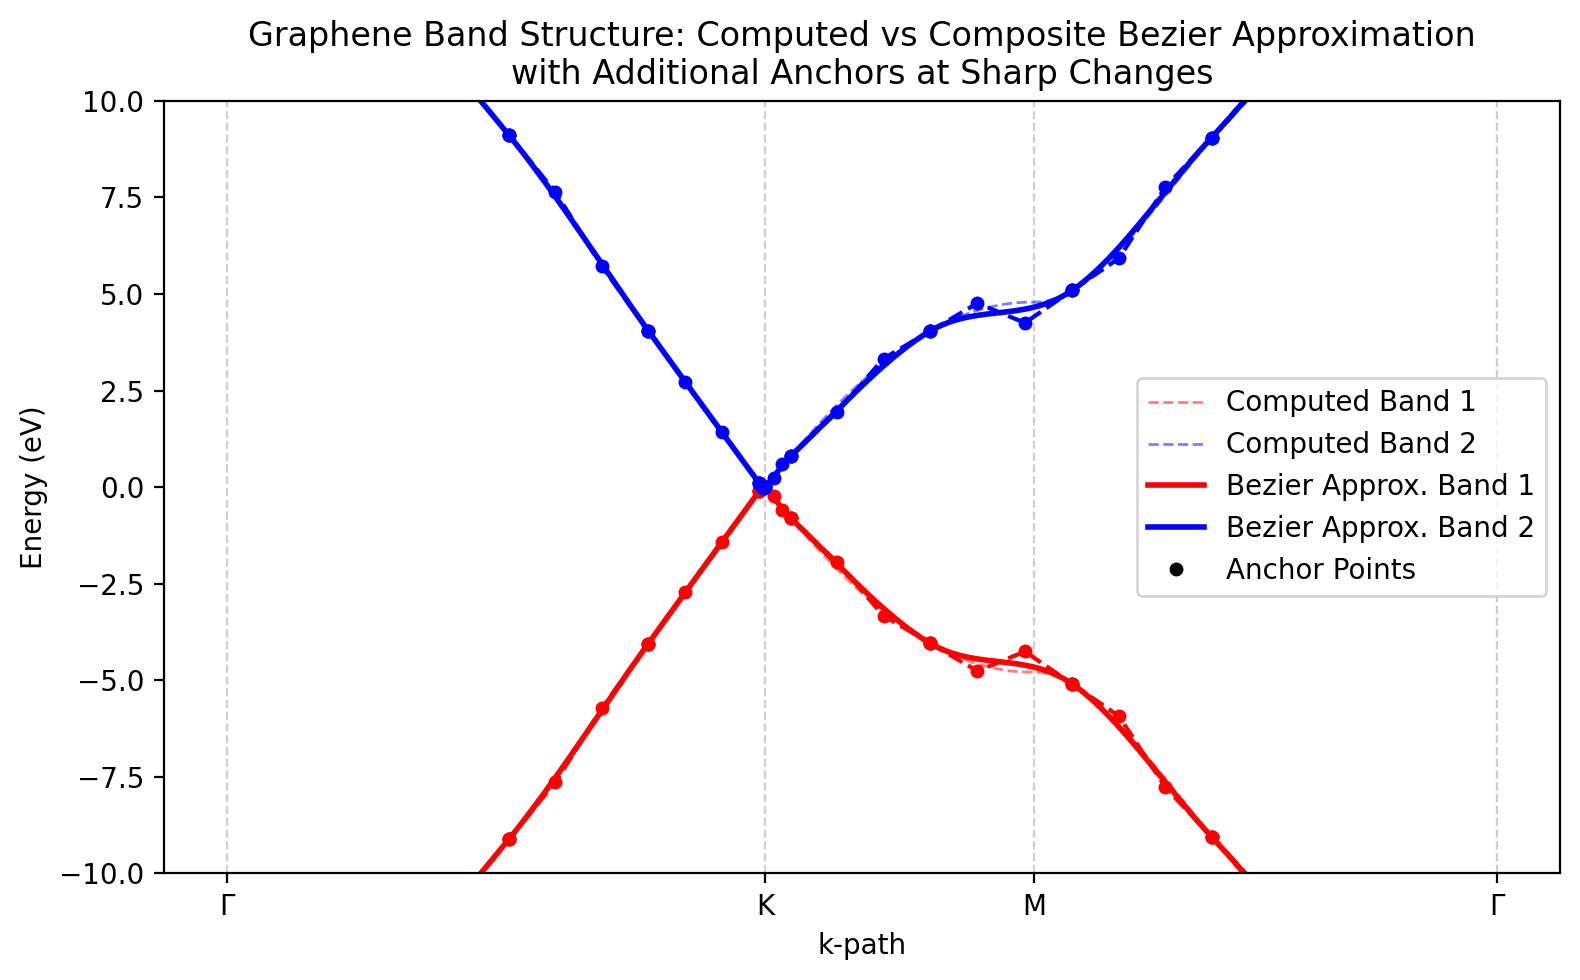

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def hamiltonian_pz(kpts):
    """
    Constructs the Hamiltonian for pz orbitals in graphene.
    """
    a0 = 1.42  # Carbon-carbon bond length in Ångstroms
    Ep = 0     # On-site energy for pz orbitals
    Vpps = 5.618  # Sigma-bonding contribution
    Vppp = -3.070  # Pi-bonding contribution
    t = (1/3) * Vpps + Vppp  # Effective hopping parameter

    # Define lattice vectors
    R1 = a0 * np.array([0, 1])
    R2 = a0 * np.array([-np.sqrt(3)/2, -1/2])
    R3 = a0 * np.array([np.sqrt(3)/2, -1/2])

    # Phase factors
    k1 = np.dot(kpts, R1)
    k2 = np.dot(kpts, R2)
    k3 = np.dot(kpts, R3)
    f = np.exp(1j * k1) + np.exp(1j * k2) + np.exp(1j * k3)

    # Hamiltonian matrix for pz-only model
    A = Ep
    B = 4 * t * f
    H = np.array([[A, B], [np.conj(B), A]])
    return H

def cubic_bezier(P0, P1, P2, P3, num=100):
    """
    Returns num points on a cubic Bezier curve defined by control points P0, P1, P2, P3.
    Each P is a 2D point (x,y).
    """
    t = np.linspace(0, 1, num)
    curve = np.outer((1-t)**3, P0) + np.outer(3*(1-t)**2*t, P1) \
          + np.outer(3*(1-t)*t**2, P2) + np.outer(t**3, P3)
    return curve

# --- Define high-symmetry points and parameters ---
a = 2.46  # Lattice constant in Ångstroms
K_const = 2 * np.pi / a  # Reciprocal lattice constant

# Reciprocal lattice vectors
b1 = K_const * np.array([1, 1/np.sqrt(3)])
b2 = K_const * np.array([1, -1/np.sqrt(3)])

# High-symmetry points:
# Γ = (0,0), K = 1/3*(b1+b2), M = 1/2*(b1-b2)
G_vec = np.array([0, 0])
K_frac = np.array([1/3, 1/3])
M_frac = np.array([0, 1/2])
G = G_vec  # Γ at origin
K_point = K_frac[0] * b1 + K_frac[1] * b2
M_point = M_frac[0] * b1 + M_frac[1] * b2

# Define the full k–path: Γ -> K -> M -> Γ
dk = 1e-2
NK1 = round(np.linalg.norm(K_point - G) / dk)
NK2 = round(np.linalg.norm(M_point - K_point) / dk)
NK3 = round(np.linalg.norm(G - M_point) / dk)
NT = NK1 + NK2 + NK3
k_region = np.linspace(0, 1, NT)

# --- Compute the full band structure along the k–path (for reference) ---
band_full = np.zeros((NT, 2))
# Γ -> K
t1_vals = np.linspace(0, 1, NK1)
for i, t in enumerate(t1_vals):
    kpt = G + t*(K_point - G)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i, :] = np.real(eigvals)
# K -> M
t2_vals = np.linspace(0, 1, NK2)
for i, t in enumerate(t2_vals):
    kpt = K_point + t*(M_point - K_point)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i+NK1, :] = np.real(eigvals)
# M -> Γ
t3_vals = np.linspace(0, 1, NK3)
for i, t in enumerate(t3_vals):
    kpt = M_point + t*(G - M_point)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i+NK1+NK2, :] = np.real(eigvals)

# --- Determine anchor points where the bands change/bend the most ---
def get_anchor_indices(k_region, band_values, num_uniform=10, num_extra=3):
    """
    Combines uniformly sampled indices with additional indices at points
    where the absolute second derivative (approximate curvature) is highest.
    """
    uniform_indices = np.linspace(0, len(k_region)-1, num=num_uniform, dtype=int)
    # Compute first and second derivatives
    first_deriv = np.gradient(band_values, k_region)
    second_deriv = np.gradient(first_deriv, k_region)
    # Get indices corresponding to the largest curvature (absolute second derivative)
    extra_indices = np.argsort(np.abs(second_deriv))[-num_extra:]
    # Combine and sort unique indices
    all_indices = np.sort(np.unique(np.concatenate((uniform_indices, extra_indices))))
    return all_indices

# For each band, get the anchor indices.
indices_band0 = get_anchor_indices(k_region, band_full[:, 0], num_uniform=10, num_extra=3)
indices_band1 = get_anchor_indices(k_region, band_full[:, 1], num_uniform=10, num_extra=3)

# Use separate anchors per band
anchors = {
    0: (k_region[indices_band0], band_full[indices_band0, 0]),
    1: (k_region[indices_band1], band_full[indices_band1, 1])
}

def compute_derivatives(x, y):
    """
    Compute approximate derivatives at anchor points using finite differences.
    """
    m = np.zeros_like(y)
    n = len(y)
    for i in range(n):
        if i == 0:
            m[i] = (y[i+1] - y[i]) / (x[i+1] - x[i])
        elif i == n - 1:
            m[i] = (y[i] - y[i-1]) / (x[i] - x[i-1])
        else:
            m[i] = (y[i+1] - y[i-1]) / (x[i+1] - x[i-1])
    return m

# Compute derivatives for each band's anchors.
derivatives = {
    band: compute_derivatives(anchors[band][0], anchors[band][1])
    for band in [0, 1]
}

def bezier_from_anchors(x, y, m, num_seg=100):
    """
    Construct a composite Bezier curve from anchor points (x,y) with derivatives m.
    Each segment uses a cubic Bezier curve determined by endpoints and estimated slopes.
    Returns the composite curve and a list of control points for each segment.
    """
    curve_x = []
    curve_y = []
    control_points_list = []  # Store control points for each segment
    n = len(x)
    for i in range(n-1):
        x0, y0, m0 = x[i], y[i], m[i]
        x1, y1, m1 = x[i+1], y[i+1], m[i+1]
        dx = x1 - x0
        # Determine control points using a cubic Hermite formulation:
        P0 = np.array([x0, y0])
        P3 = np.array([x1, y1])
        P1 = np.array([x0 + dx/3.0, y0 + (dx/3.0)*m0])
        P2 = np.array([x1 - dx/3.0, y1 - (dx/3.0)*m1])
        control_points_list.append(np.array([P0, P1, P2, P3]))
        segment = cubic_bezier(P0, P1, P2, P3, num_seg)
        if i > 0:
            segment = segment[1:]  # Avoid duplicate points at segment boundaries.
        curve_x.extend(segment[:,0])
        curve_y.extend(segment[:,1])
    return np.array(curve_x), np.array(curve_y), control_points_list

# Generate composite Bezier curves and control points for each band.
bezier_curves = {}
control_points_all = {}
for band in [0, 1]:
    bx, by, cp_list = bezier_from_anchors(anchors[band][0], anchors[band][1],
                                          derivatives[band])
    bezier_curves[band] = (bx, by)
    control_points_all[band] = cp_list

# --- Plotting ---
plt.figure(figsize=(8, 5))
# Plot the original computed bands.
plt.plot(k_region, band_full[:, 0], 'r--', linewidth=1, alpha=0.5, label='Computed Band 1')
plt.plot(k_region, band_full[:, 1], 'b--', linewidth=1, alpha=0.5, label='Computed Band 2')
# Plot the composite Bezier interpolations.
plt.plot(bezier_curves[0][0], bezier_curves[0][1], 'r', linewidth=2, label='Bezier Approx. Band 1')
plt.plot(bezier_curves[1][0], bezier_curves[1][1], 'b', linewidth=2, label='Bezier Approx. Band 2')
# Mark the anchor points.
plt.plot(anchors[0][0], anchors[0][1], 'ko', markersize=4, label='Anchor Points')
plt.plot(anchors[1][0], anchors[1][1], 'ko', markersize=4)

# Plot control points for each segment for each band.
for band, color in zip([0, 1], ['r', 'b']):
    for cp in control_points_all[band]:
        plt.plot(cp[:,0], cp[:,1], 'o--', color=color, markersize=4)

# Set up x-ticks at high-symmetry points using known indices.
kpoints_idx = [0, NK1, NK1 + NK2, NT - 1]
kpoints_x = k_region[kpoints_idx]
kpoints_labels = ['Γ', 'K', 'M', 'Γ']
plt.xticks(kpoints_x, kpoints_labels)

plt.xlabel('k-path')
plt.ylabel('Energy (eV)')
plt.title('Graphene Band Structure: Computed vs Composite Bezier Approximation\nwith Additional Anchors at Sharp Changes')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.ylim([-10, 10])
plt.legend()
plt.tight_layout()
plt.show()

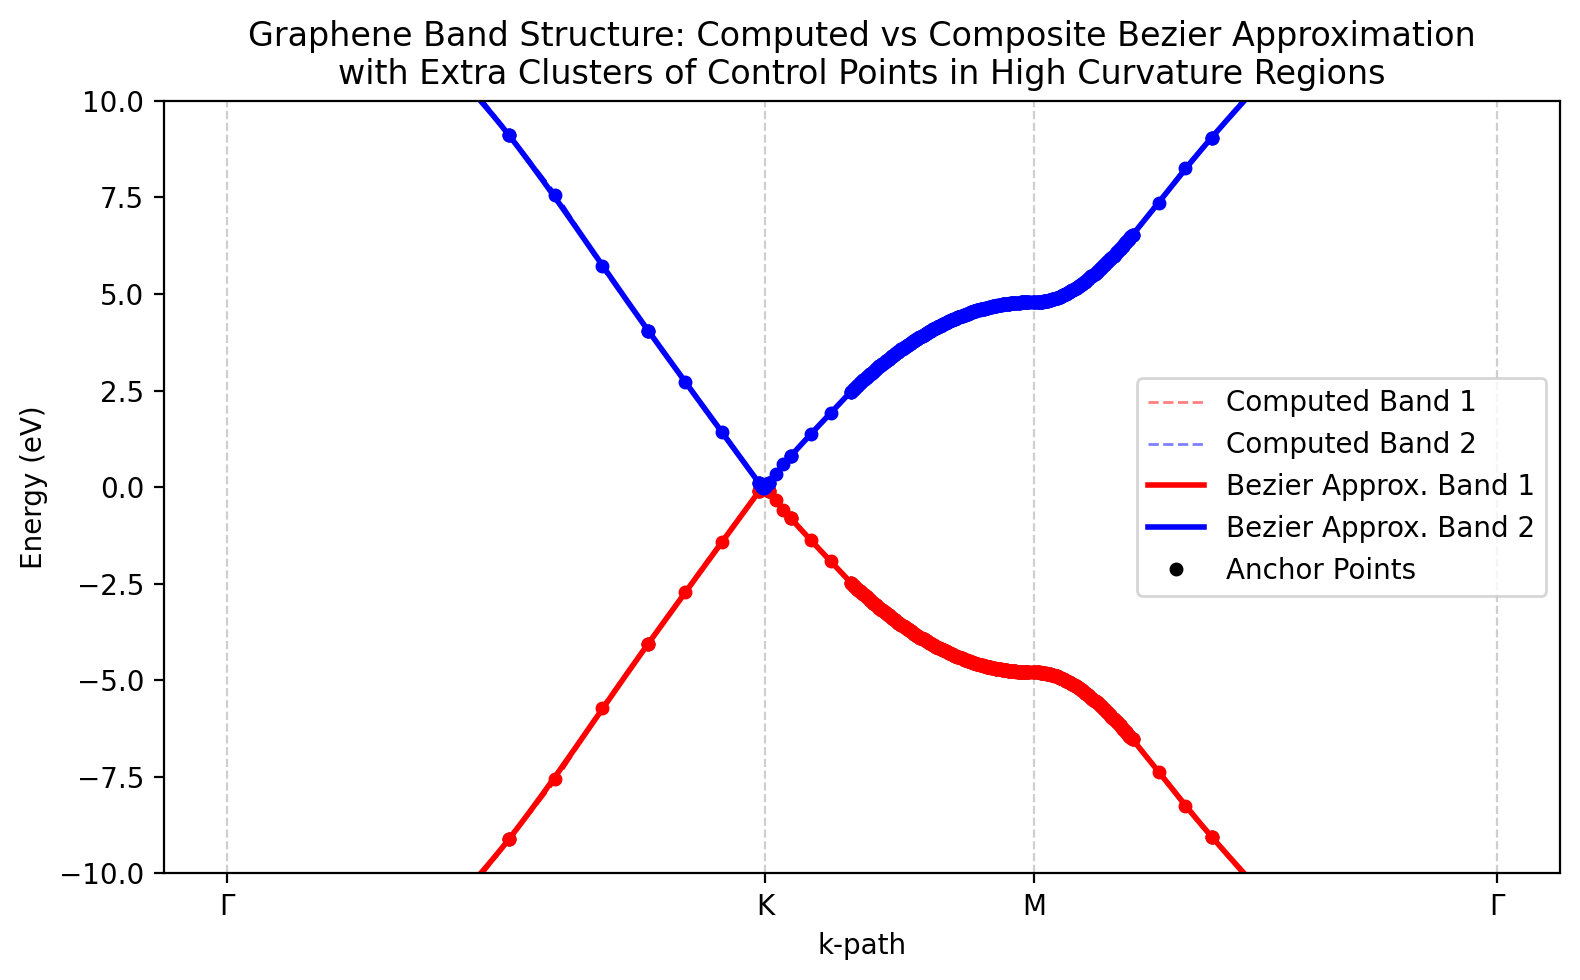

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def hamiltonian_pz(kpts):
    """
    Constructs the Hamiltonian for pz orbitals in graphene.
    """
    a0 = 1.42  # Carbon-carbon bond length in Ångstroms
    Ep = 0     # On-site energy for pz orbitals
    Vpps = 5.618  # Sigma-bonding contribution
    Vppp = -3.070  # Pi-bonding contribution
    t = (1/3) * Vpps + Vppp  # Effective hopping parameter

    # Define lattice vectors
    R1 = a0 * np.array([0, 1])
    R2 = a0 * np.array([-np.sqrt(3)/2, -1/2])
    R3 = a0 * np.array([np.sqrt(3)/2, -1/2])

    # Phase factors
    k1 = np.dot(kpts, R1)
    k2 = np.dot(kpts, R2)
    k3 = np.dot(kpts, R3)
    f = np.exp(1j * k1) + np.exp(1j * k2) + np.exp(1j * k3)

    # Hamiltonian matrix for pz-only model
    A = Ep
    B = 4 * t * f
    H = np.array([[A, B], [np.conj(B), A]])
    return H

def cubic_bezier(P0, P1, P2, P3, num=100):
    """
    Returns num points on a cubic Bezier curve defined by control points P0, P1, P2, P3.
    Each P is a 2D point (x,y).
    """
    t = np.linspace(0, 1, num)
    curve = np.outer((1-t)**3, P0) + np.outer(3*(1-t)**2*t, P1) \
          + np.outer(3*(1-t)*t**2, P2) + np.outer(t**3, P3)
    return curve

# --- Define high-symmetry points and parameters ---
a = 2.46  # Lattice constant in Ångstroms
K_const = 2 * np.pi / a  # Reciprocal lattice constant

# Reciprocal lattice vectors
b1 = K_const * np.array([1, 1/np.sqrt(3)])
b2 = K_const * np.array([1, -1/np.sqrt(3)])

# High-symmetry points:
# Γ = (0,0), K = 1/3*(b1+b2), M = 1/2*(b1-b2)
G_vec = np.array([0, 0])
K_frac = np.array([1/3, 1/3])
M_frac = np.array([0, 1/2])
G = G_vec  # Γ at origin
K_point = K_frac[0] * b1 + K_frac[1] * b2
M_point = M_frac[0] * b1 + M_frac[1] * b2

# Define the full k–path: Γ -> K -> M -> Γ
dk = 1e-2
NK1 = round(np.linalg.norm(K_point - G) / dk)
NK2 = round(np.linalg.norm(M_point - K_point) / dk)
NK3 = round(np.linalg.norm(G - M_point) / dk)
NT = NK1 + NK2 + NK3
k_region = np.linspace(0, 1, NT)

# --- Compute the full band structure along the k–path (for reference) ---
band_full = np.zeros((NT, 2))
# Γ -> K
t1_vals = np.linspace(0, 1, NK1)
for i, t in enumerate(t1_vals):
    kpt = G + t*(K_point - G)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i, :] = np.real(eigvals)
# K -> M
t2_vals = np.linspace(0, 1, NK2)
for i, t in enumerate(t2_vals):
    kpt = K_point + t*(M_point - K_point)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i+NK1, :] = np.real(eigvals)
# M -> Γ
t3_vals = np.linspace(0, 1, NK3)
for i, t in enumerate(t3_vals):
    kpt = M_point + t*(G - M_point)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i+NK1+NK2, :] = np.real(eigvals)

# --- Determine anchor points with extra clusters in high curvature regions ---
def get_clustered_anchor_indices(k_region, band_values, num_uniform=10, threshold_percentile=70):
    """
    Combines uniformly sampled indices with additional anchor points from clusters where the
    absolute second derivative (approximate curvature) exceeds a given percentile threshold.
    """
    uniform_indices = np.linspace(0, len(k_region)-1, num=num_uniform, dtype=int)
    # Compute first and second derivatives (approximating the curvature)
    first_deriv = np.gradient(band_values, k_region)
    second_deriv = np.gradient(first_deriv, k_region)
    curvature = np.abs(second_deriv)
    # Set threshold based on the given percentile
    threshold = np.percentile(curvature, threshold_percentile)
    # Get indices where curvature exceeds threshold (i.e. regions of high bending)
    extra_indices = np.where(curvature > threshold)[0]
    # Combine the uniform anchors with the extra clustered points and sort
    all_indices = np.sort(np.unique(np.concatenate((uniform_indices, extra_indices))))
    return all_indices

# For each band, get the clustered anchor indices. Adjust these to get a closer approximation as needed.
indices_band0 = get_clustered_anchor_indices(k_region, band_full[:, 0], num_uniform=10, threshold_percentile=50)
indices_band1 = get_clustered_anchor_indices(k_region, band_full[:, 1], num_uniform=10, threshold_percentile=50)

# Define anchors for each band using the computed indices.
anchors = {
    0: (k_region[indices_band0], band_full[indices_band0, 0]),
    1: (k_region[indices_band1], band_full[indices_band1, 1])
}

def compute_derivatives(x, y):
    """
    Compute approximate derivatives at anchor points using finite differences.
    """
    m = np.zeros_like(y)
    n = len(y)
    for i in range(n):
        if i == 0:
            m[i] = (y[i+1] - y[i]) / (x[i+1] - x[i])
        elif i == n - 1:
            m[i] = (y[i] - y[i-1]) / (x[i] - x[i-1])
        else:
            m[i] = (y[i+1] - y[i-1]) / (x[i+1] - x[i-1])
    return m

# Compute derivatives for each band's anchors.
derivatives = {
    band: compute_derivatives(anchors[band][0], anchors[band][1])
    for band in [0, 1]
}

def bezier_from_anchors(x, y, m, num_seg=100):
    """
    Construct a composite Bezier curve from anchor points (x,y) with derivatives m.
    Each segment uses a cubic Bezier curve determined by endpoints and estimated slopes.
    Returns the composite curve and a list of control points for each segment.
    """
    curve_x = []
    curve_y = []
    control_points_list = []  # Store control points for each segment
    n = len(x)
    for i in range(n-1):
        x0, y0, m0 = x[i], y[i], m[i]
        x1, y1, m1 = x[i+1], y[i+1], m[i+1]
        dx = x1 - x0
        # Determine control points using a cubic Hermite formulation:
        P0 = np.array([x0, y0])
        P3 = np.array([x1, y1])
        P1 = np.array([x0 + dx/3.0, y0 + (dx/3.0)*m0])
        P2 = np.array([x1 - dx/3.0, y1 - (dx/3.0)*m1])
        control_points_list.append(np.array([P0, P1, P2, P3]))
        segment = cubic_bezier(P0, P1, P2, P3, num_seg)
        if i > 0:
            segment = segment[1:]  # Avoid duplicate points at segment boundaries.
        curve_x.extend(segment[:,0])
        curve_y.extend(segment[:,1])
    return np.array(curve_x), np.array(curve_y), control_points_list

# Generate composite Bezier curves and control points for each band.
bezier_curves = {}
control_points_all = {}
for band in [0, 1]:
    bx, by, cp_list = bezier_from_anchors(anchors[band][0], anchors[band][1],
                                          derivatives[band])
    bezier_curves[band] = (bx, by)
    control_points_all[band] = cp_list

# --- Plotting ---
plt.figure(figsize=(8, 5))
# Plot the original computed bands.
plt.plot(k_region, band_full[:, 0], 'r--', linewidth=1, alpha=0.5, label='Computed Band 1')
plt.plot(k_region, band_full[:, 1], 'b--', linewidth=1, alpha=0.5, label='Computed Band 2')
# Plot the composite Bezier interpolations.
plt.plot(bezier_curves[0][0], bezier_curves[0][1], 'r', linewidth=2, label='Bezier Approx. Band 1')
plt.plot(bezier_curves[1][0], bezier_curves[1][1], 'b', linewidth=2, label='Bezier Approx. Band 2')
# Mark the anchor points.
plt.plot(anchors[0][0], anchors[0][1], 'ko', markersize=4, label='Anchor Points')
plt.plot(anchors[1][0], anchors[1][1], 'ko', markersize=4)
# Plot control points for each segment for each band.
for band, color in zip([0, 1], ['r', 'b']):
    for cp in control_points_all[band]:
        plt.plot(cp[:,0], cp[:,1], 'o--', color=color, markersize=4)
# Set up x-ticks at high-symmetry points using known indices.
kpoints_idx = [0, NK1, NK1 + NK2, NT - 1]
kpoints_x = k_region[kpoints_idx]
kpoints_labels = ['Γ', 'K', 'M', 'Γ']
plt.xticks(kpoints_x, kpoints_labels)
plt.xlabel('k-path')
plt.ylabel('Energy (eV)')
plt.title('Graphene Band Structure: Computed vs Composite Bezier Approximation\nwith Extra Clusters of Control Points in High Curvature Regions')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.ylim([-10, 10])
plt.legend()
plt.tight_layout()
plt.show()

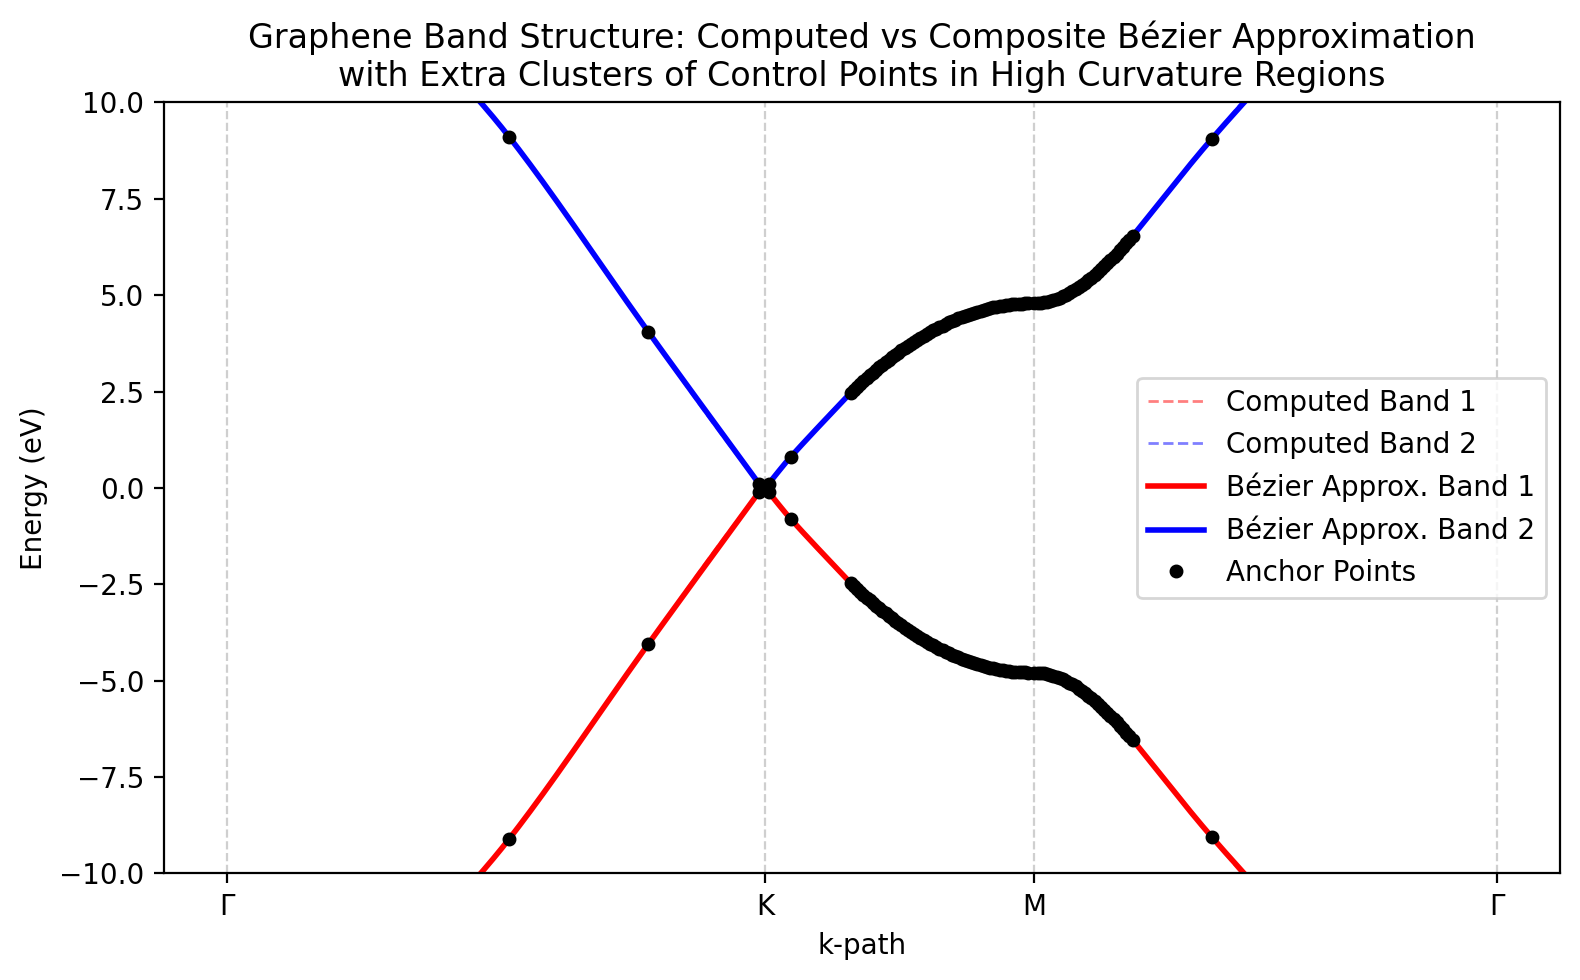

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def hamiltonian_pz(kpts):
    """
    Constructs the Hamiltonian for pz orbitals in graphene.
    """
    a0 = 1.42  # Carbon-carbon bond length in Ångstroms
    Ep = 0     # On-site energy for pz orbitals
    Vpps = 5.618  # Sigma-bonding contribution
    Vppp = -3.070  # Pi-bonding contribution
    t = (1/3) * Vpps + Vppp  # Effective hopping parameter

    # Define lattice vectors
    R1 = a0 * np.array([0, 1])
    R2 = a0 * np.array([-np.sqrt(3)/2, -1/2])
    R3 = a0 * np.array([np.sqrt(3)/2, -1/2])

    # Phase factors
    k1 = np.dot(kpts, R1)
    k2 = np.dot(kpts, R2)
    k3 = np.dot(kpts, R3)
    f = np.exp(1j * k1) + np.exp(1j * k2) + np.exp(1j * k3)

    # Hamiltonian matrix for pz-only model
    A = Ep
    B = 4 * t * f
    H = np.array([[A, B], [np.conj(B), A]])
    return H

def cubic_bezier(P0, P1, P2, P3, num=100):
    """
    Returns num points on a cubic Bézier curve defined by control points P0, P1, P2, P3.
    Each P is a 2D point (x,y).
    """
    t = np.linspace(0, 1, num)
    curve = np.outer((1-t)**3, P0) + np.outer(3*(1-t)**2*t, P1) \
          + np.outer(3*(1-t)*t**2, P2) + np.outer(t**3, P3)
    return curve

# --- Define high-symmetry points and parameters ---
a = 2.46  # Lattice constant in Ångstroms
K_const = 2 * np.pi / a  # Reciprocal lattice constant

# Reciprocal lattice vectors
b1 = K_const * np.array([1, 1/np.sqrt(3)])
b2 = K_const * np.array([1, -1/np.sqrt(3)])

# High-symmetry points:
# Γ = (0,0), K = 1/3*(b1+b2), M = 1/2*(b1-b2)
G_vec = np.array([0, 0])
K_frac = np.array([1/3, 1/3])
M_frac = np.array([0, 1/2])
G = G_vec  # Γ at origin
K_point = K_frac[0] * b1 + K_frac[1] * b2
M_point = M_frac[0] * b1 + M_frac[1] * b2

# Define the full k–path: Γ -> K -> M -> Γ
dk = 1e-2
NK1 = round(np.linalg.norm(K_point - G) / dk)
NK2 = round(np.linalg.norm(M_point - K_point) / dk)
NK3 = round(np.linalg.norm(G - M_point) / dk)
NT = NK1 + NK2 + NK3
k_region = np.linspace(0, 1, NT)

# --- Compute the full band structure along the k–path (for reference) ---
band_full = np.zeros((NT, 2))
# Γ -> K
t1_vals = np.linspace(0, 1, NK1)
for i, t in enumerate(t1_vals):
    kpt = G + t*(K_point - G)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i, :] = np.real(eigvals)
# K -> M
t2_vals = np.linspace(0, 1, NK2)
for i, t in enumerate(t2_vals):
    kpt = K_point + t*(M_point - K_point)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i+NK1, :] = np.real(eigvals)
# M -> Γ
t3_vals = np.linspace(0, 1, NK3)
for i, t in enumerate(t3_vals):
    kpt = M_point + t*(G - M_point)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i+NK1+NK2, :] = np.real(eigvals)

# --- Determine anchor points with extra clusters in high curvature regions ---
def get_clustered_anchor_indices(k_region, band_values, num_uniform=10, threshold_percentile=50):
    """
    Combines uniformly sampled indices with additional anchor points from clusters where the
    absolute second derivative (approximate curvature) exceeds a given percentile threshold.
    """
    uniform_indices = np.linspace(0, len(k_region)-1, num=num_uniform, dtype=int)
    # Compute first and second derivatives (approximating the curvature)
    first_deriv = np.gradient(band_values, k_region)
    second_deriv = np.gradient(first_deriv, k_region)
    curvature = np.abs(second_deriv)
    # Set threshold based on the given percentile
    threshold = np.percentile(curvature, threshold_percentile)
    # Get indices where curvature exceeds threshold (i.e. regions of high bending)
    extra_indices = np.where(curvature > threshold)[0]
    # Combine the uniform anchors with the extra clustered points and sort
    all_indices = np.sort(np.unique(np.concatenate((uniform_indices, extra_indices))))
    return all_indices

# For each band, get the clustered anchor indices.
indices_band0 = get_clustered_anchor_indices(k_region, band_full[:, 0], num_uniform=10, threshold_percentile=50)
indices_band1 = get_clustered_anchor_indices(k_region, band_full[:, 1], num_uniform=10, threshold_percentile=50)

# Define anchors for each band using the computed indices.
anchors = {
    0: (k_region[indices_band0], band_full[indices_band0, 0]),
    1: (k_region[indices_band1], band_full[indices_band1, 1])
}

def compute_derivatives(x, y):
    """
    Compute approximate derivatives at anchor points using finite differences.
    """
    m = np.zeros_like(y)
    n = len(y)
    for i in range(n):
        if i == 0:
            m[i] = (y[i+1] - y[i]) / (x[i+1] - x[i])
        elif i == n - 1:
            m[i] = (y[i] - y[i-1]) / (x[i] - x[i-1])
        else:
            m[i] = (y[i+1] - y[i-1]) / (x[i+1] - x[i-1])
    return m

# Compute derivatives for each band's anchors.
derivatives = {
    band: compute_derivatives(anchors[band][0], anchors[band][1])
    for band in [0, 1]
}

def bezier_from_anchors(x, y, m, num_seg=100):
    """
    Construct a composite Bézier curve from anchor points (x,y) with derivatives m.
    Each segment uses a cubic Bézier curve determined by endpoints and estimated slopes.
    Returns the composite curve and a list of control points for each segment.
    """
    curve_x = []
    curve_y = []
    control_points_list = []  # Store control points for each segment
    n = len(x)
    for i in range(n-1):
        x0, y0, m0 = x[i], y[i], m[i]
        x1, y1, m1 = x[i+1], y[i+1], m[i+1]
        dx = x1 - x0
        # Determine control points using a cubic Hermite formulation:
        P0 = np.array([x0, y0])
        P3 = np.array([x1, y1])
        P1 = np.array([x0 + dx/3.0, y0 + (dx/3.0)*m0])
        P2 = np.array([x1 - dx/3.0, y1 - (dx/3.0)*m1])
        control_points_list.append(np.array([P0, P1, P2, P3]))
        segment = cubic_bezier(P0, P1, P2, P3, num_seg)
        if i > 0:
            segment = segment[1:]  # Avoid duplicate points at segment boundaries.
        curve_x.extend(segment[:,0])
        curve_y.extend(segment[:,1])
    return np.array(curve_x), np.array(curve_y), control_points_list

# Generate composite Bézier curves and control points for each band.
bezier_curves = {}
control_points_all = {}
for band in [0, 1]:
    bx, by, cp_list = bezier_from_anchors(anchors[band][0], anchors[band][1],
                                          derivatives[band])
    bezier_curves[band] = (bx, by)
    control_points_all[band] = cp_list

# --- Plotting ---
plt.figure(figsize=(8, 5))
# Plot the original computed bands.
plt.plot(k_region, band_full[:, 0], 'r--', linewidth=1, alpha=0.5, label='Computed Band 1')
plt.plot(k_region, band_full[:, 1], 'b--', linewidth=1, alpha=0.5, label='Computed Band 2')
# Plot the composite Bézier interpolations.
plt.plot(bezier_curves[0][0], bezier_curves[0][1], 'r', linewidth=2, label='Bézier Approx. Band 1')
plt.plot(bezier_curves[1][0], bezier_curves[1][1], 'b', linewidth=2, label='Bézier Approx. Band 2')
# Mark the anchor points.
plt.plot(anchors[0][0], anchors[0][1], 'ko', markersize=4, label='Anchor Points')
plt.plot(anchors[1][0], anchors[1][1], 'ko', markersize=4)

# (Removed code for plotting control points so they are not visible)

# Set up x-ticks at high-symmetry points using known indices.
kpoints_idx = [0, NK1, NK1 + NK2, NT - 1]
kpoints_x = k_region[kpoints_idx]
kpoints_labels = ['Γ', 'K', 'M', 'Γ']
plt.xticks(kpoints_x, kpoints_labels)

plt.xlabel('k-path')
plt.ylabel('Energy (eV)')
plt.title('Graphene Band Structure: Computed vs Composite Bézier Approximation\nwith Extra Clusters of Control Points in High Curvature Regions')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.ylim([-10, 10])
plt.legend()
plt.tight_layout()
plt.show()

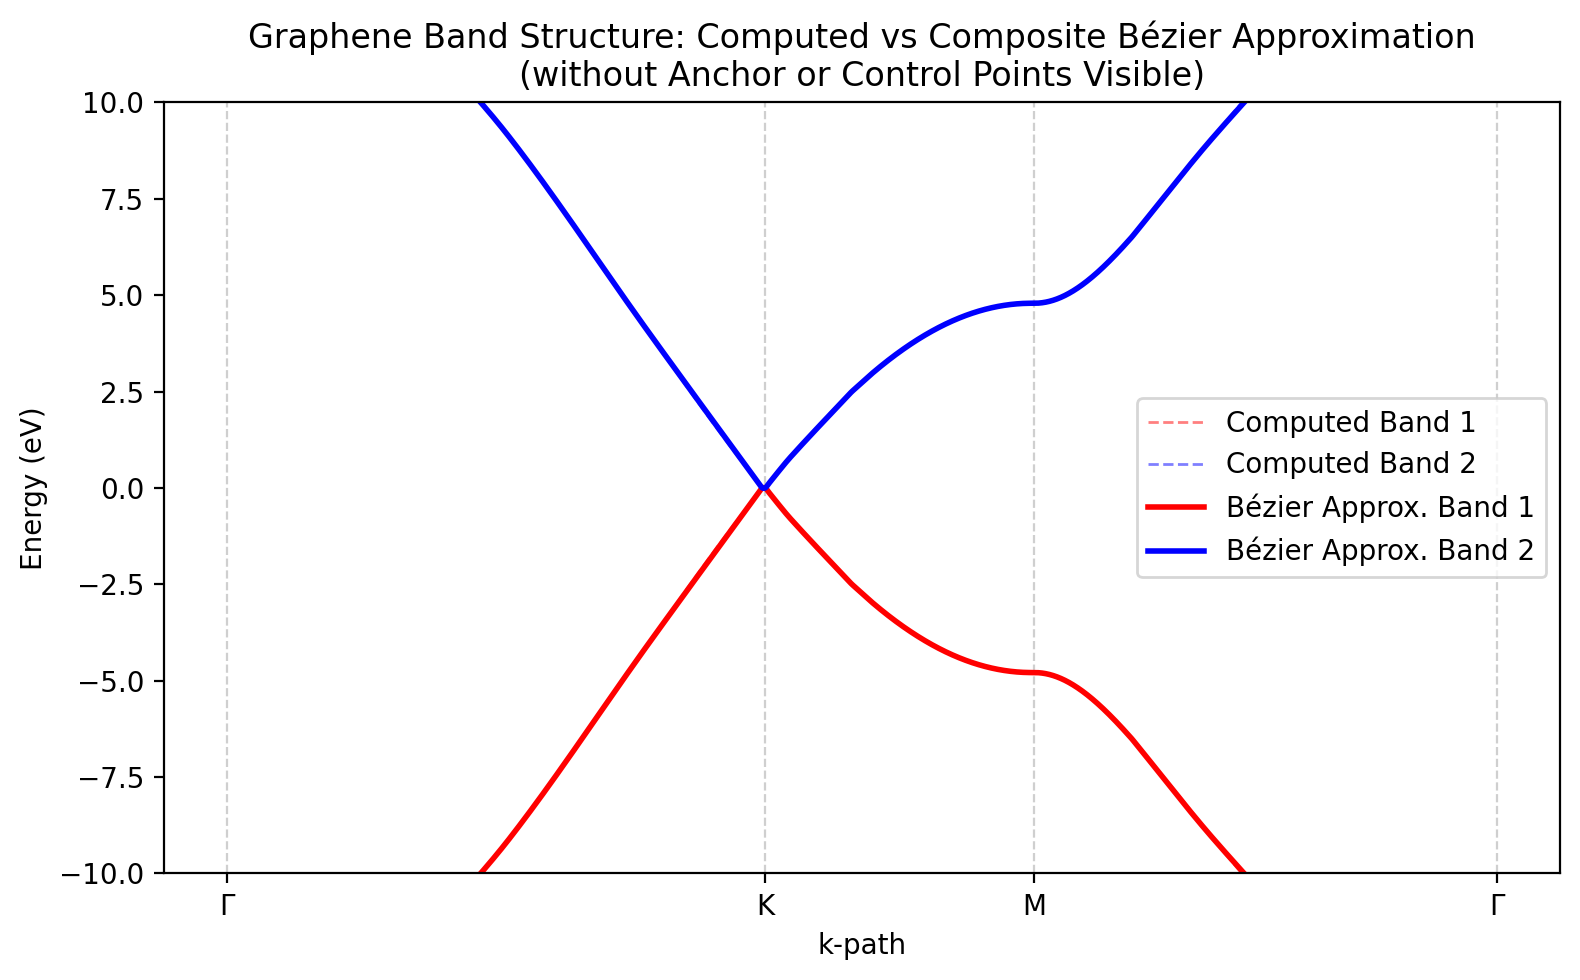

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def hamiltonian_pz(kpts):
    """
    Constructs the Hamiltonian for pz orbitals in graphene.
    """
    a0 = 1.42  # Carbon-carbon bond length in Ångstroms
    Ep = 0     # On-site energy for pz orbitals
    Vpps = 5.618  # Sigma-bonding contribution
    Vppp = -3.070  # Pi-bonding contribution
    t = (1/3) * Vpps + Vppp  # Effective hopping parameter

    # Define lattice vectors
    R1 = a0 * np.array([0, 1])
    R2 = a0 * np.array([-np.sqrt(3)/2, -1/2])
    R3 = a0 * np.array([np.sqrt(3)/2, -1/2])

    # Phase factors
    k1 = np.dot(kpts, R1)
    k2 = np.dot(kpts, R2)
    k3 = np.dot(kpts, R3)
    f = np.exp(1j * k1) + np.exp(1j * k2) + np.exp(1j * k3)

    # Hamiltonian matrix for pz-only model
    A = Ep
    B = 4 * t * f
    H = np.array([[A, B], [np.conj(B), A]])
    return H

def cubic_bezier(P0, P1, P2, P3, num=100):
    """
    Returns num points on a cubic Bézier curve defined by control points P0, P1, P2, P3.
    Each P is a 2D point (x,y).
    """
    t = np.linspace(0, 1, num)
    curve = np.outer((1-t)**3, P0) + np.outer(3*(1-t)**2*t, P1) \
          + np.outer(3*(1-t)*t**2, P2) + np.outer(t**3, P3)
    return curve

# --- Define high-symmetry points and parameters ---
a = 2.46  # Lattice constant in Ångstroms
K_const = 2 * np.pi / a  # Reciprocal lattice constant

# Reciprocal lattice vectors
b1 = K_const * np.array([1, 1/np.sqrt(3)])
b2 = K_const * np.array([1, -1/np.sqrt(3)])

# High-symmetry points:
# Γ = (0,0), K = 1/3*(b1+b2), M = 1/2*(b1-b2)
G_vec = np.array([0, 0])
K_frac = np.array([1/3, 1/3])
M_frac = np.array([0, 1/2])
G = G_vec  # Γ at origin
K_point = K_frac[0] * b1 + K_frac[1] * b2
M_point = M_frac[0] * b1 + M_frac[1] * b2

# Define the full k–path: Γ -> K -> M -> Γ
dk = 1e-2
NK1 = round(np.linalg.norm(K_point - G) / dk)
NK2 = round(np.linalg.norm(M_point - K_point) / dk)
NK3 = round(np.linalg.norm(G - M_point) / dk)
NT = NK1 + NK2 + NK3
k_region = np.linspace(0, 1, NT)

# --- Compute the full band structure along the k–path (for reference) ---
band_full = np.zeros((NT, 2))
# Γ -> K
t1_vals = np.linspace(0, 1, NK1)
for i, t in enumerate(t1_vals):
    kpt = G + t*(K_point - G)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i, :] = np.real(eigvals)
# K -> M
t2_vals = np.linspace(0, 1, NK2)
for i, t in enumerate(t2_vals):
    kpt = K_point + t*(M_point - K_point)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i+NK1, :] = np.real(eigvals)
# M -> Γ
t3_vals = np.linspace(0, 1, NK3)
for i, t in enumerate(t3_vals):
    kpt = M_point + t*(G - M_point)
    H = hamiltonian_pz(kpt)
    eigvals = np.linalg.eigvalsh(H)
    band_full[i+NK1+NK2, :] = np.real(eigvals)

# --- Determine anchor points with extra clusters in high curvature regions ---
def get_clustered_anchor_indices(k_region, band_values, num_uniform=10, threshold_percentile=50):
    """
    Combines uniformly sampled indices with additional anchor points from clusters where the
    absolute second derivative (approximate curvature) exceeds a given percentile threshold.
    """
    uniform_indices = np.linspace(0, len(k_region)-1, num=num_uniform, dtype=int)
    # Compute first and second derivatives (approximating the curvature)
    first_deriv = np.gradient(band_values, k_region)
    second_deriv = np.gradient(first_deriv, k_region)
    curvature = np.abs(second_deriv)
    # Set threshold based on the given percentile
    threshold = np.percentile(curvature, threshold_percentile)
    # Get indices where curvature exceeds threshold (i.e. regions of high bending)
    extra_indices = np.where(curvature > threshold)[0]
    # Combine the uniform anchors with the extra clustered points and sort
    all_indices = np.sort(np.unique(np.concatenate((uniform_indices, extra_indices))))
    return all_indices

# For each band, get the clustered anchor indices.
indices_band0 = get_clustered_anchor_indices(k_region, band_full[:, 0], num_uniform=10, threshold_percentile=50)
indices_band1 = get_clustered_anchor_indices(k_region, band_full[:, 1], num_uniform=10, threshold_percentile=50)

# Define anchors for each band using the computed indices.
anchors = {
    0: (k_region[indices_band0], band_full[indices_band0, 0]),
    1: (k_region[indices_band1], band_full[indices_band1, 1])
}

def compute_derivatives(x, y):
    """
    Compute approximate derivatives at anchor points using finite differences.
    """
    m = np.zeros_like(y)
    n = len(y)
    for i in range(n):
        if i == 0:
            m[i] = (y[i+1] - y[i]) / (x[i+1] - x[i])
        elif i == n - 1:
            m[i] = (y[i] - y[i-1]) / (x[i] - x[i-1])
        else:
            m[i] = (y[i+1] - y[i-1]) / (x[i+1] - x[i-1])
    return m

# Compute derivatives for each band's anchors.
derivatives = {
    band: compute_derivatives(anchors[band][0], anchors[band][1])
    for band in [0, 1]
}

def bezier_from_anchors(x, y, m, num_seg=100):
    """
    Construct a composite Bézier curve from anchor points (x,y) with derivatives m.
    Each segment uses a cubic Bézier curve determined by endpoints and estimated slopes.
    Returns the composite curve and a list of control points for each segment.
    """
    curve_x = []
    curve_y = []
    control_points_list = []  # Store control points for each segment
    n = len(x)
    for i in range(n-1):
        x0, y0, m0 = x[i], y[i], m[i]
        x1, y1, m1 = x[i+1], y[i+1], m[i+1]
        dx = x1 - x0
        # Determine control points using a cubic Hermite formulation:
        P0 = np.array([x0, y0])
        P3 = np.array([x1, y1])
        P1 = np.array([x0 + dx/3.0, y0 + (dx/3.0)*m0])
        P2 = np.array([x1 - dx/3.0, y1 - (dx/3.0)*m1])
        control_points_list.append(np.array([P0, P1, P2, P3]))
        segment = cubic_bezier(P0, P1, P2, P3, num_seg)
        if i > 0:
            segment = segment[1:]  # Avoid duplicate points at segment boundaries.
        curve_x.extend(segment[:,0])
        curve_y.extend(segment[:,1])
    return np.array(curve_x), np.array(curve_y), control_points_list

# Generate composite Bézier curves for each band.
bezier_curves = {}
control_points_all = {}
for band in [0, 1]:
    bx, by, cp_list = bezier_from_anchors(anchors[band][0], anchors[band][1],
                                          derivatives[band])
    bezier_curves[band] = (bx, by)
    control_points_all[band] = cp_list

# --- Plotting ---
plt.figure(figsize=(8, 5))
# Plot the original computed bands.
plt.plot(k_region, band_full[:, 0], 'r--', linewidth=1, alpha=0.5, label='Computed Band 1')
plt.plot(k_region, band_full[:, 1], 'b--', linewidth=1, alpha=0.5, label='Computed Band 2')
# Plot the composite Bézier interpolations.
plt.plot(bezier_curves[0][0], bezier_curves[0][1], 'r', linewidth=2, label='Bézier Approx. Band 1')
plt.plot(bezier_curves[1][0], bezier_curves[1][1], 'b', linewidth=2, label='Bézier Approx. Band 2')

# (Removed plotting of anchor points and control points)

# Set up x-ticks at high-symmetry points using known indices.
kpoints_idx = [0, NK1, NK1 + NK2, NT - 1]
kpoints_x = k_region[kpoints_idx]
kpoints_labels = ['Γ', 'K', 'M', 'Γ']
plt.xticks(kpoints_x, kpoints_labels)

plt.xlabel('k-path')
plt.ylabel('Energy (eV)')
plt.title('Graphene Band Structure: Computed vs Composite Bézier Approximation\n(without Anchor or Control Points Visible)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.ylim([-10, 10])
plt.legend()
plt.tight_layout()
plt.show()